![img](logo.png)


---
# Compte Rendu des Travaux Pratiques Traitement d'images avec Python
---

# Introducion Générale 

<p style="text-align: justify"> L'avènement des Réseaux sociaux a créé un véritable boom dans le monde.Les réseaux sociaux ont contribué à une repensée profonde des infrastures existantes jusqu'à lors (serveurs, bases de données etc).
Et l'une des preuves les plus palpables de cet effet réseaux sociaux est la quantité des données générées chaque jour dans le monde.
    D'après le magazine Forbes <sup><a href="https://www.forbes.com/sites/bernardmarr/2018/05/21/how-much-data-do-we-create-every-day-the-mind-blowing-stats-everyone-should-read/?sh=f38d96e60ba9" ></a> 1</sup>, 2.5 quintillion d'octets générées chaque jour.
Parmi ces données,4.7 trillions de photos sont partagées sur les différents réseaux sociaux (Facebook,Tik-tok).
Ces photos sont issues de plusieurs sources (Smartphone,Appareil photo professionel,Caméra Numérique,Analogique etc), auront besoin d'être traités.
En outre, au moment où les technologies de reconnaissance faciale sont de plus en plus utilisées, elles reposent sur des images qui doivent être traitées afin d'obtenir des modèles performant et précis. </p>

# TP1: Manipulation et Transformation des Images Numériques

##  Introduction

<p style="text-align: justify">L'objectif de ce TP était pour nous de nous initiatier à la manipulation avec Python des images images Numériques.</br>
Des opérantions telles que le changement et la sauvegarde d'une image, l'opération d'echantillonnage et de quantification.
</p>

##  Lecture,visualisation et sauvegarde d’images

* **Importer les modules nécessaires**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os,sys
from skimage import exposure, data
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


* **Lire l'image lena.bmp et la stocker dans la variable Im1 avec la fonction « plt.imread ».**	

In [51]:
im1 = plt.imread("images2021/lena.bmp")


* **Afficher l'image avec « plt.imshow » et choisir palette gray.**	

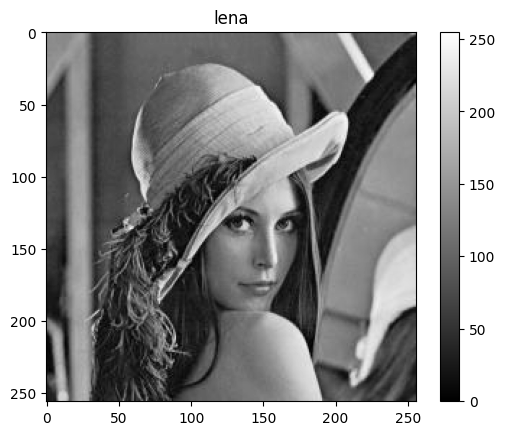

In [52]:
plt.imshow(im1,cmap='gray')
plt.title("lena")
plt.colorbar()


* **Déterminer les dimensions de l’image.**

In [53]:
im1.shape

(256, 256)

* **Récupérer le niveau de gris du pixel [120,200].**	


In [54]:
im1[120,200]

30

* **Récupérer une sous-matrice de dimensions 100*100 au milieu de l’image, sauvegarder l’image récupérée dans la matrice Im2.**


In [55]:
x = (im1.shape[0]-100)//2
y = (im1.shape[1]-100)//2

im2 =  im1[x:x+100,y:y+100]

* **Sauvegarder la matrice Im2 dans le fichier lenapart1.jpg, avec.**


In [56]:
plt.imsave('images2021/lenapart1.jpg',im2,cmap='gray')

## Systèmes de représentation de couleurs et de types d’images

* **Charger l’image clown.bmp et vérifier que c’est une image en couleur.**

In [57]:
img_clow = plt.imread("images2021/clown.bmp")

* **Afficher l’image obtenue.**


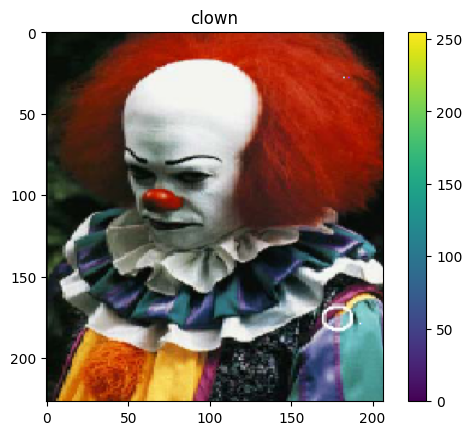

In [58]:
plt.imshow(img_clow)
plt.title("clown")
plt.colorbar()


* **Ecrire la fonction « extrait_comp.py » qui extrait les trois composantes C1, C2, C3 d’une image et les afficher séparément.**

In [59]:
def extract_components(image):
    plt.figure(figsize=(16,8),dpi=200)
    plt.subplot(141)
    plt.imshow(image)
    plt.title("clown Originale")
    plt.subplot(142)
    plt.title("Red Component")
    plt.imshow(image[:,:,0],cmap='gray')
    plt.subplot(143)
    plt.title("Green Component")
    plt.imshow(image[:,:,1],cmap='gray')
    plt.subplot(144)
    plt.title("Blue Component")
    plt.imshow(image[:,:,2],cmap='gray')
    plt.colorbar()
     

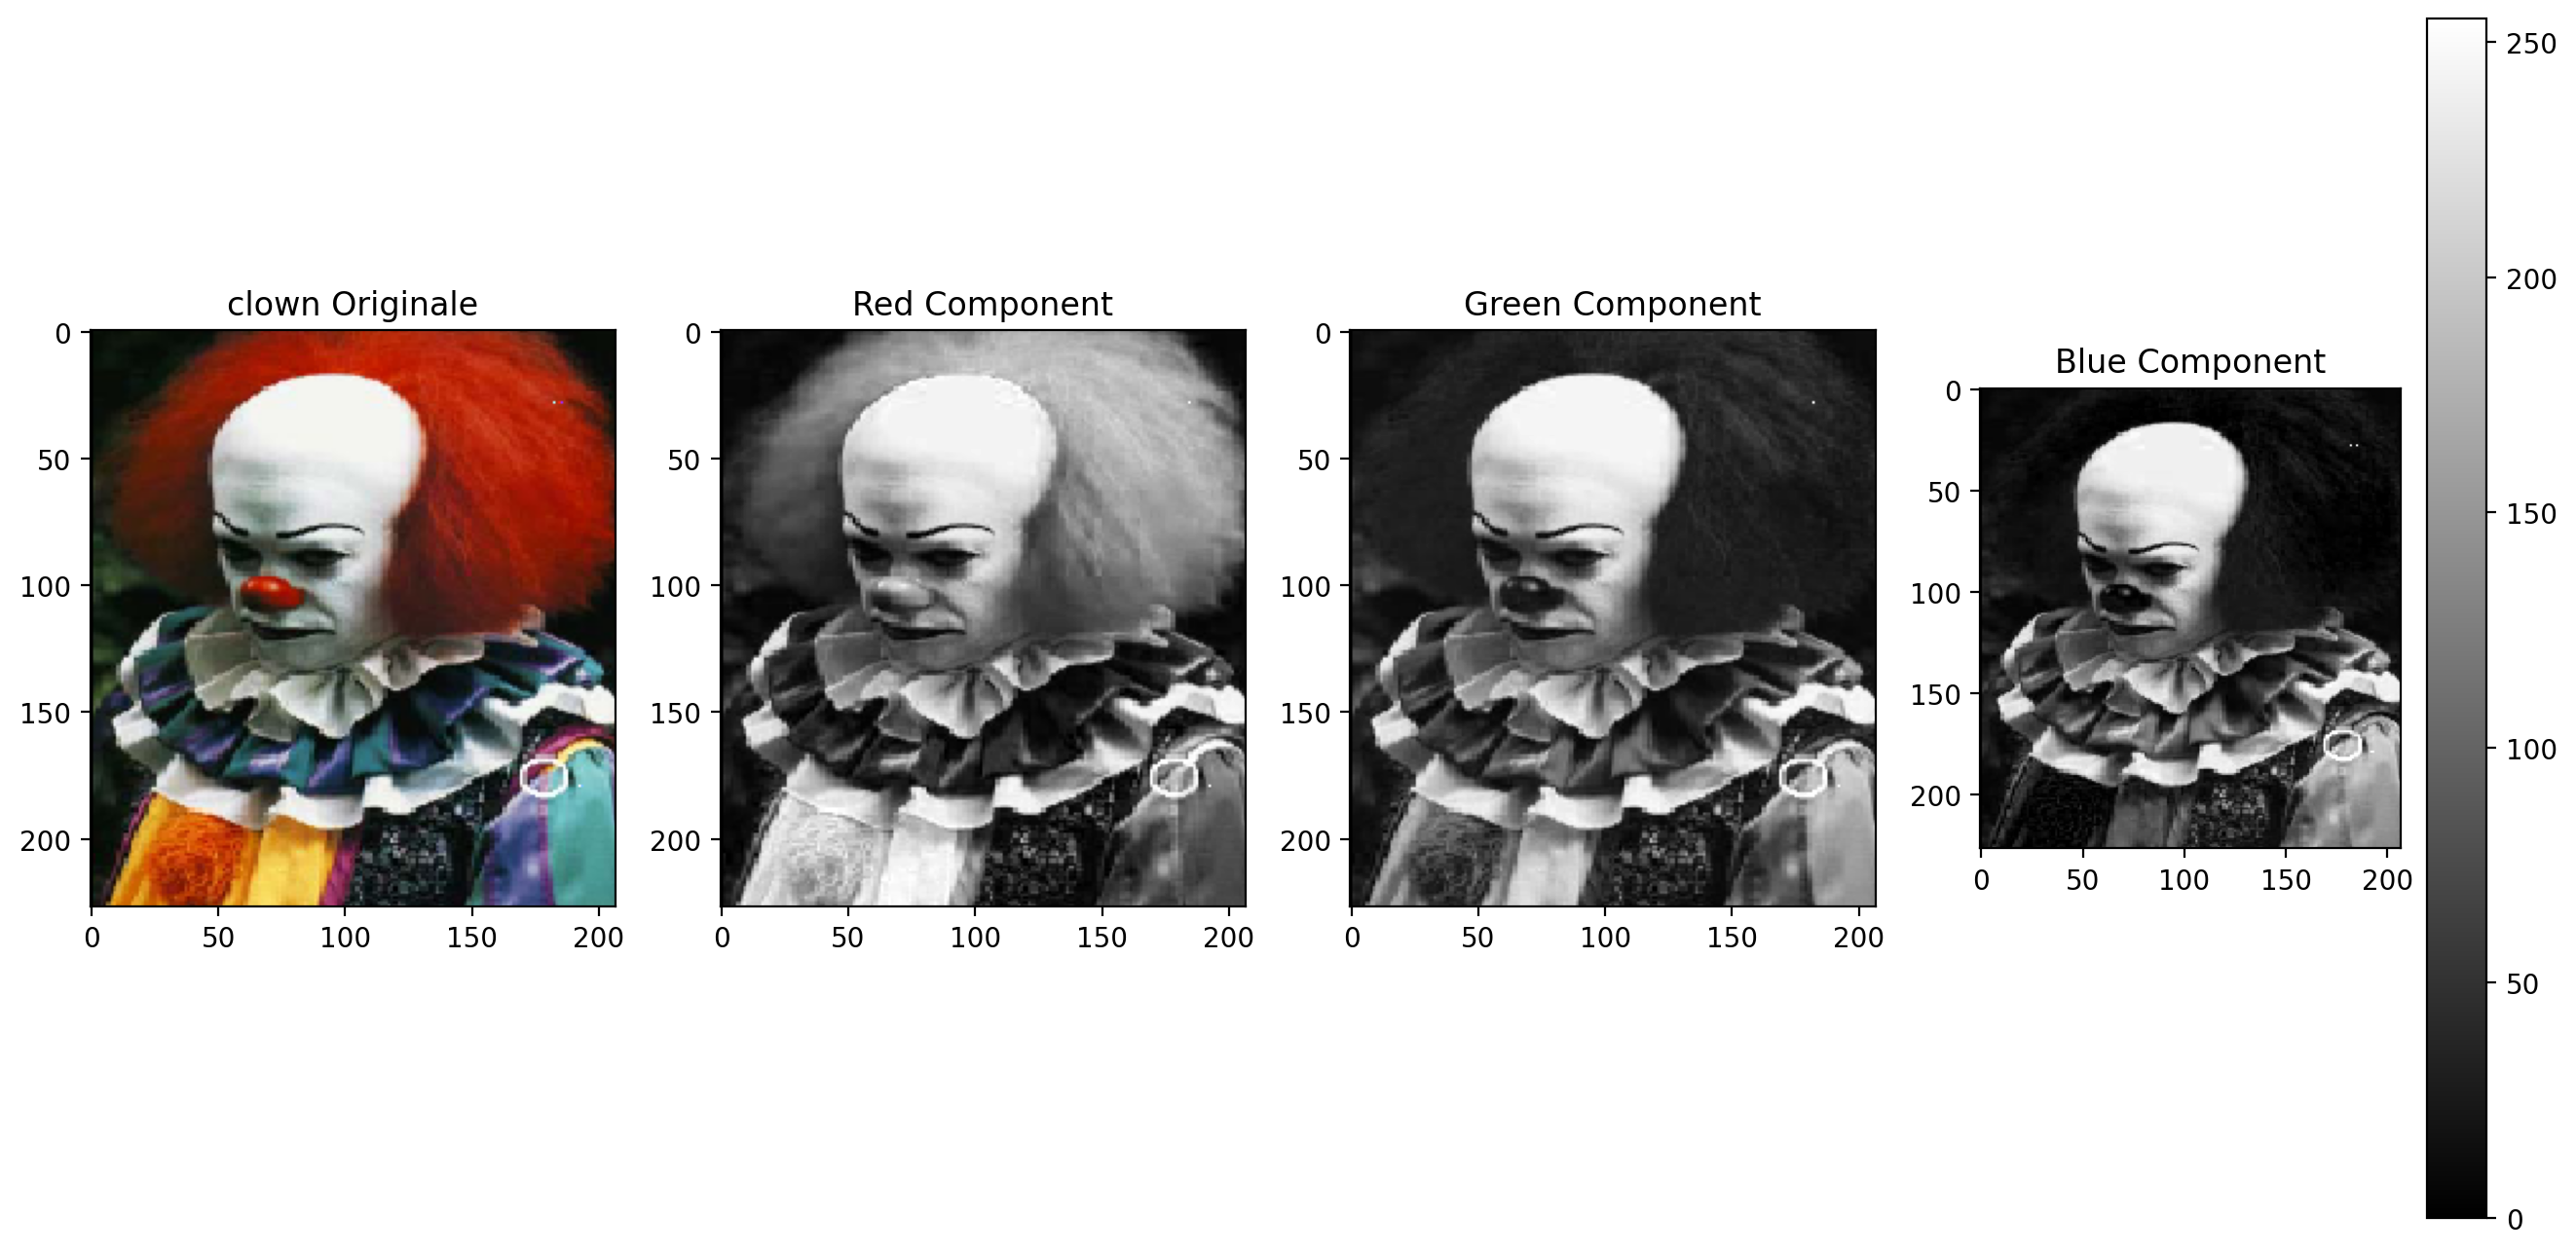

In [60]:
extract_components(img_clow)

## Re-échantillonage

* **Charger l'image lena.bmp.**

In [61]:
lena_bmp = plt.imread("images2021/lena.bmp")

* **Créer une version sous-échantillonnée par un facteur 2 de cette image.**

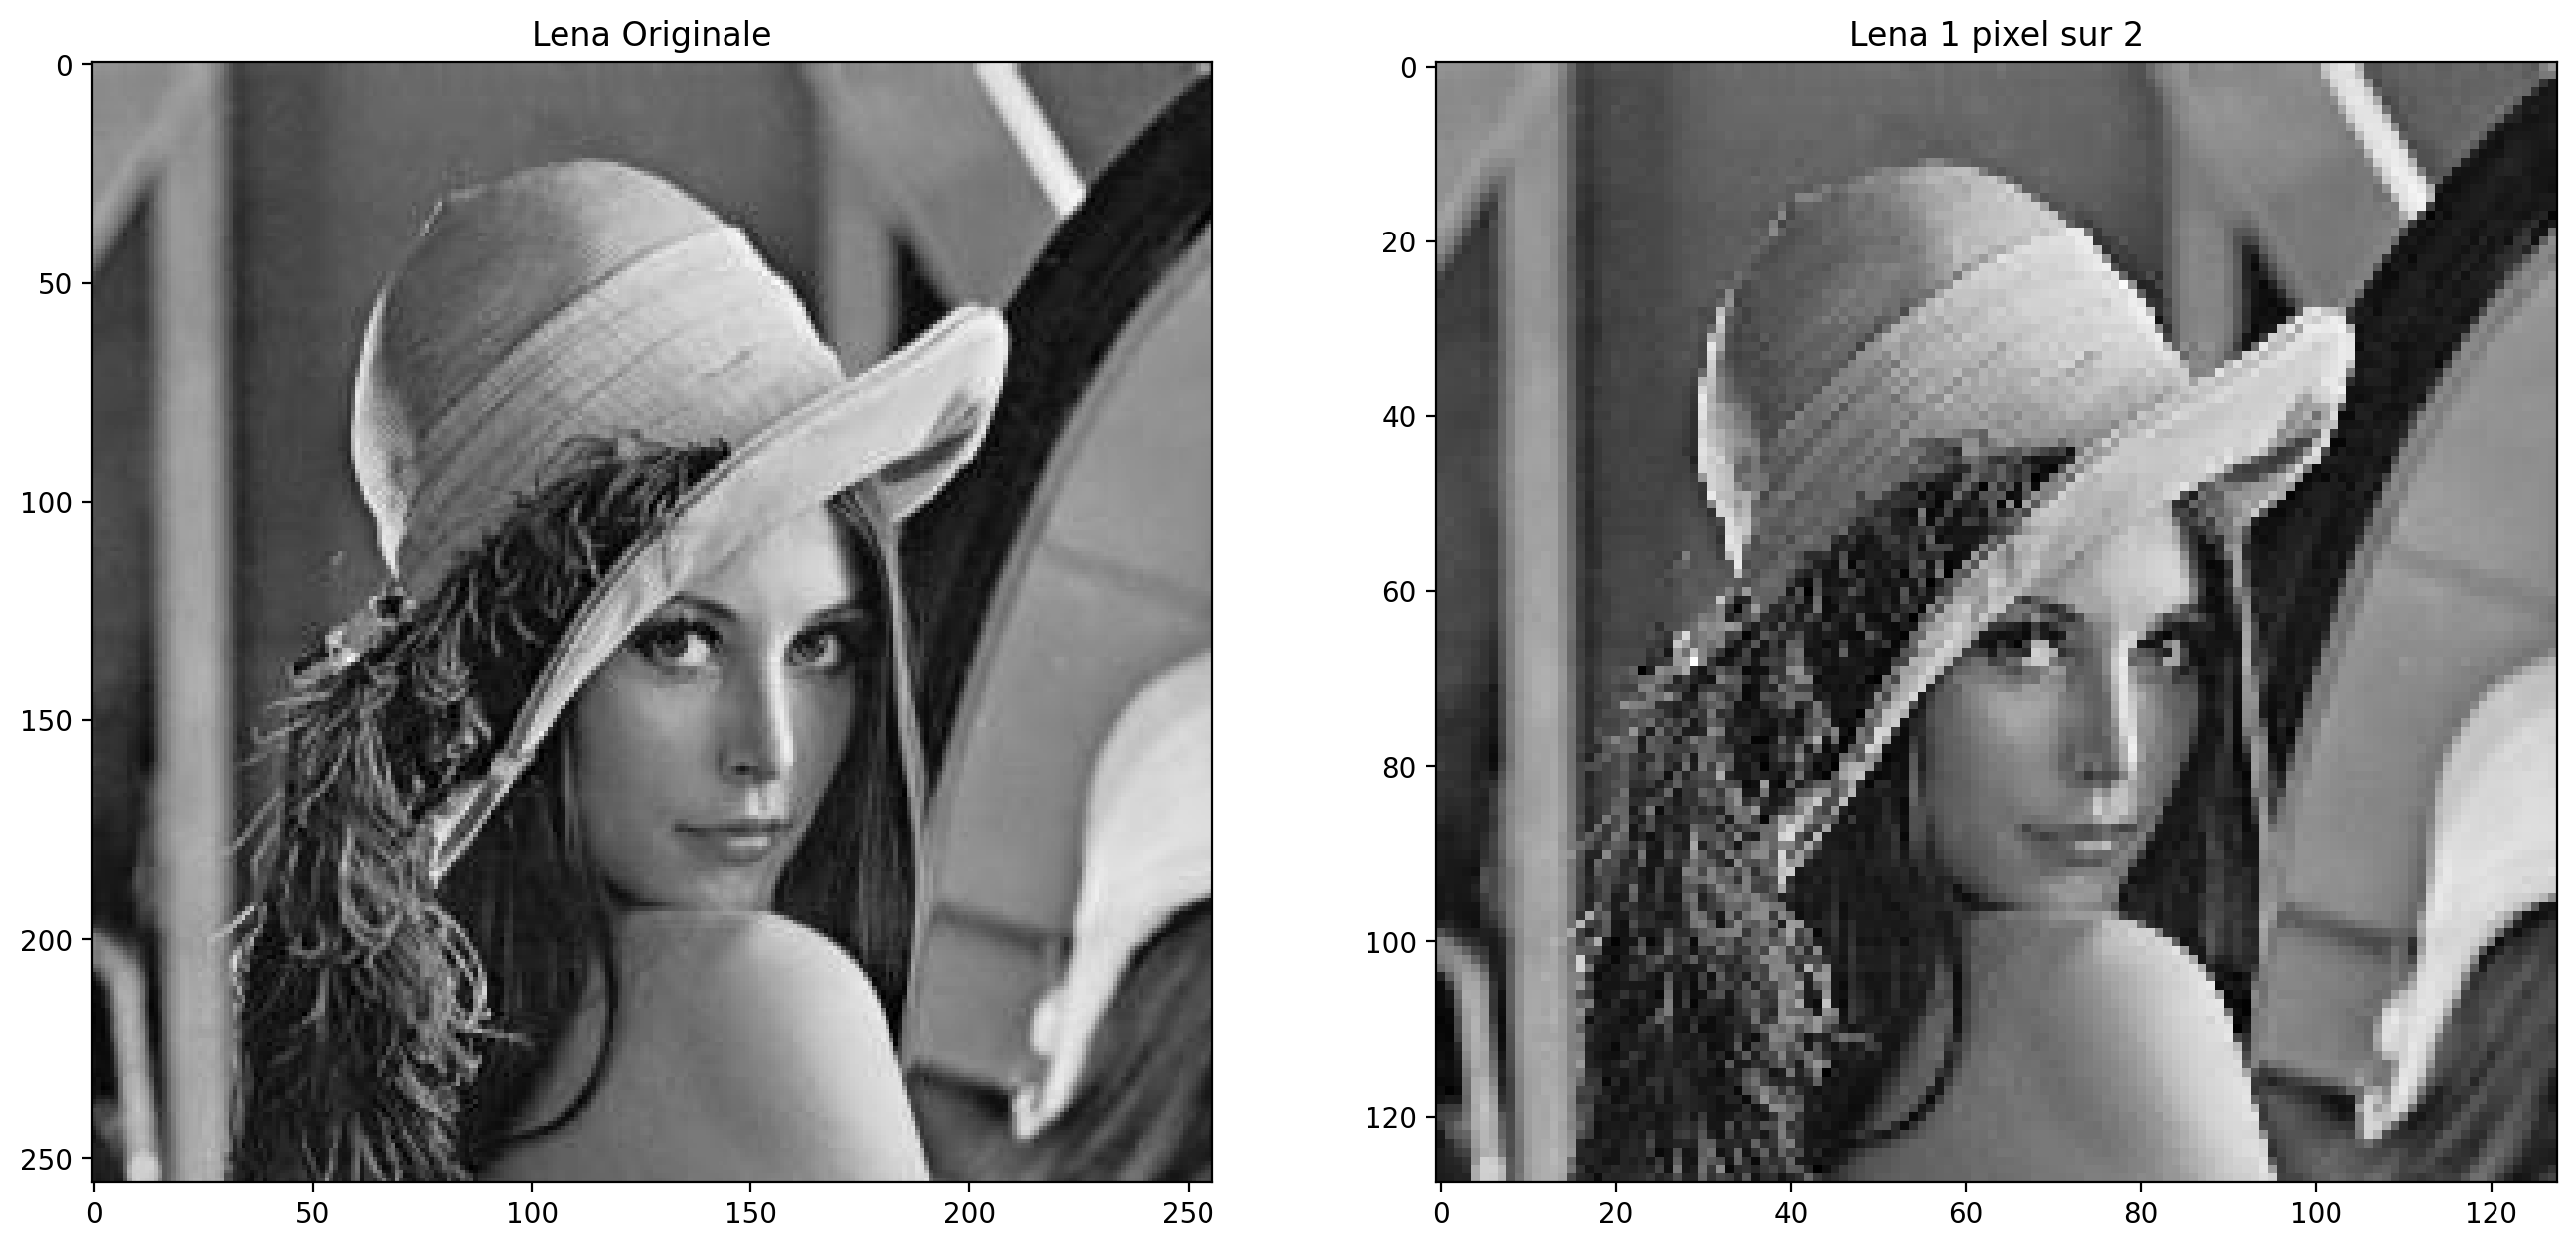

In [62]:
lena_bmp_2 = lena_bmp[::2,::2]
plt.figure(figsize=(16,8),dpi=200)
plt.subplot(121)
plt.imshow(lena_bmp,cmap='gray')
plt.title("Lena Originale")
plt.subplot(122)
plt.title("Lena 1 pixel sur 2")
plt.imshow(lena_bmp_2,cmap='gray')

* **Créer la même fonction sans utiliser de boucles**



In [63]:
def reechantillonage(image,pe):
    return image[:image.shape[0]:pe,:image.shape[1]:pe]

* **Afficher l'image ainsi obtenue**

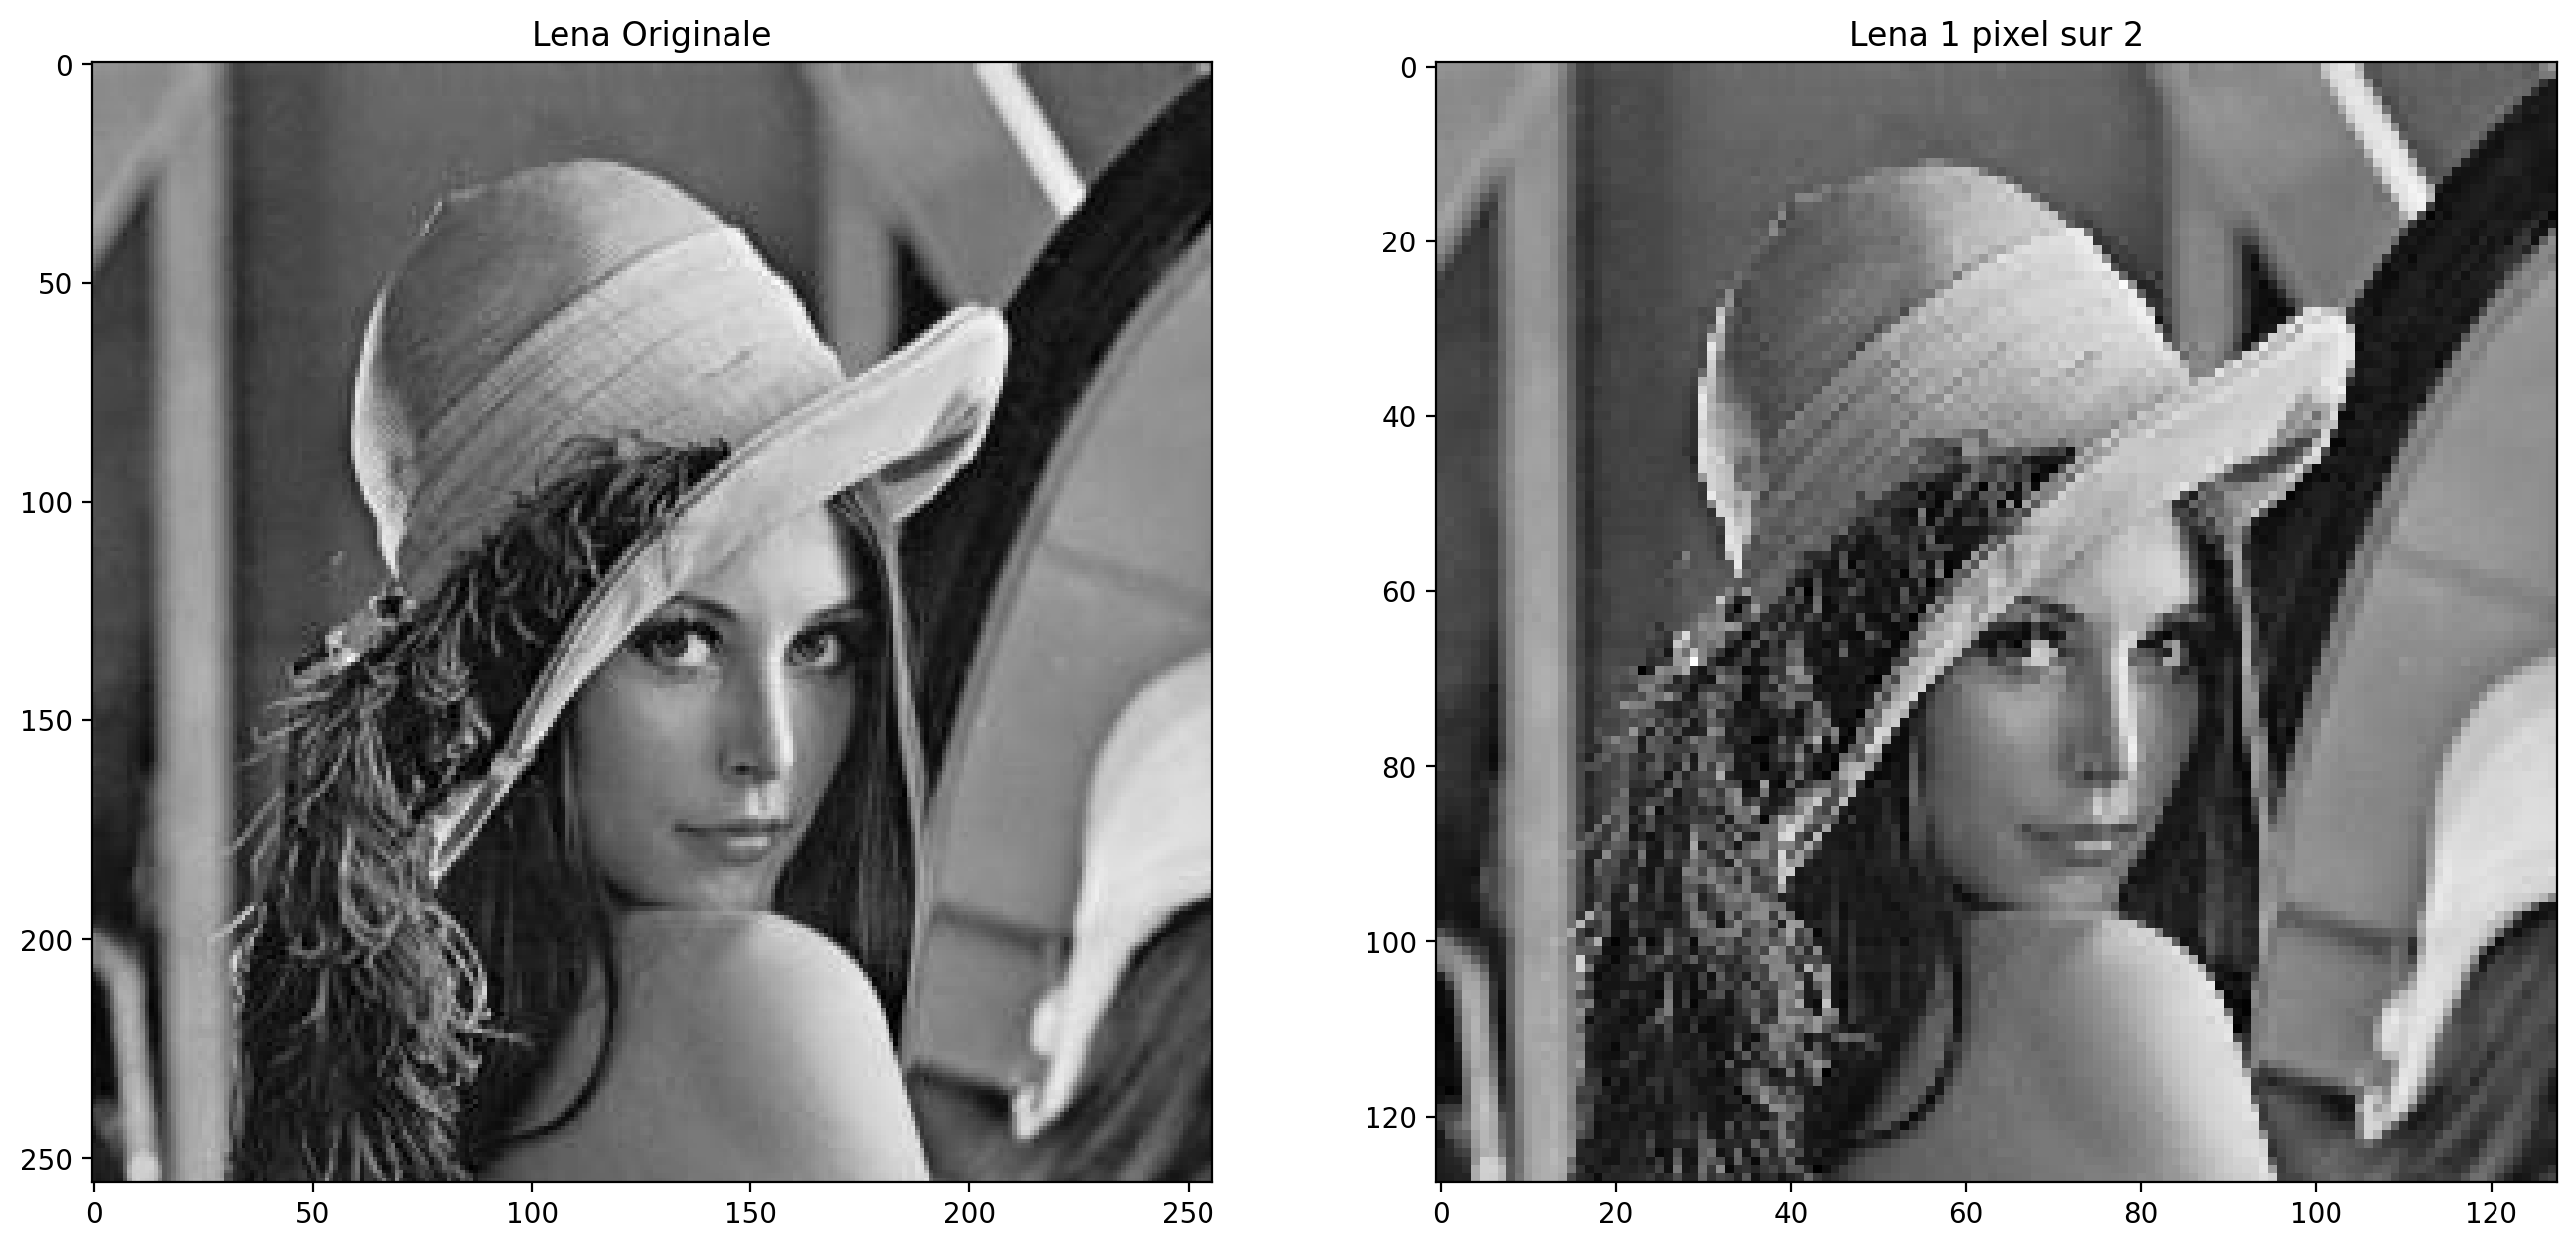

In [64]:
plt.figure(figsize=(16,8),dpi=200)
plt.subplot(121)
plt.imshow(lena_bmp,cmap='gray')
plt.title("Lena Originale")
plt.subplot(122)
plt.title("Lena 1 pixel sur 2")
plt.imshow(reechantillonage(lena_bmp,2),cmap='gray')


* **Décriver les effets du sous-échantillonnage sur l'image.** 

L'image obtenue après un réechantillonage de 2 est mauvaise qualité par rapport à l'image originale.

* **Refaite la même chose avec un facteur 4.**

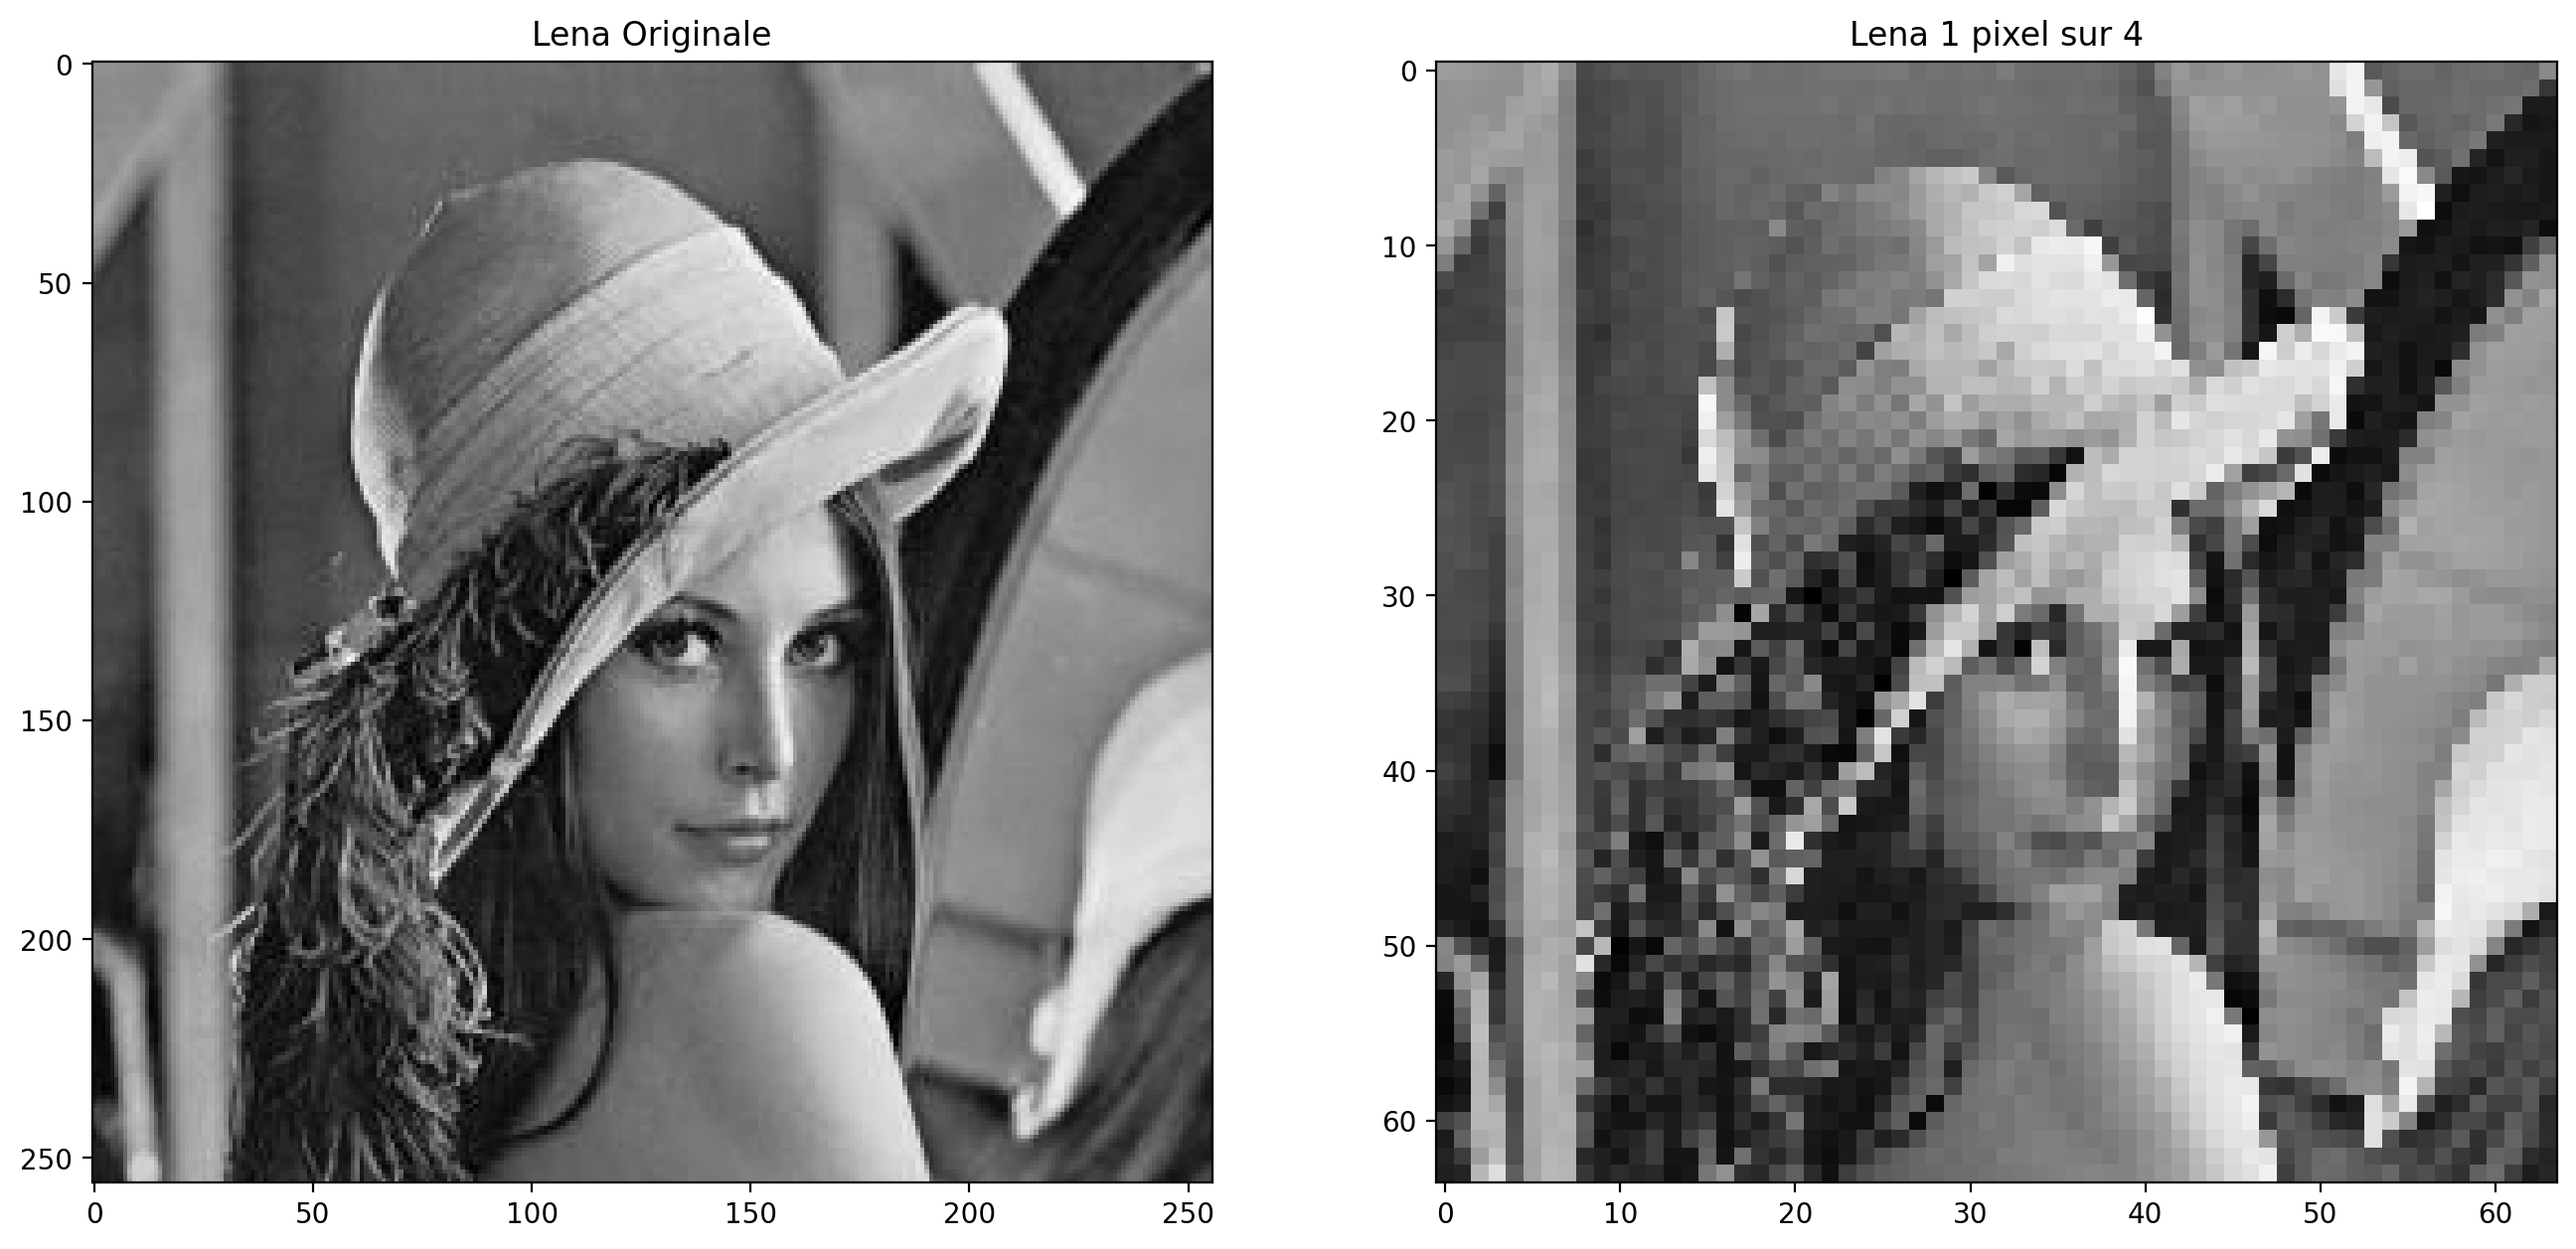

In [65]:
plt.figure(figsize=(16,8),dpi=200)
plt.subplot(121)
plt.imshow(lena_bmp,cmap='gray')
plt.title("Lena Originale")
plt.subplot(122)
plt.title("Lena 1 pixel sur 4")
plt.imshow(reechantillonage(lena_bmp,4),cmap='gray')

# TP2: Transformation d'images




## Introduction : 


<p style="text-align: justify">Le but de ce TP est de tester plusieurs transformations des images numériques ainsi que des transformations appliquées à l’image.</br>
Nous verrons comment ces différentes transformations peuvent affecter l'image et son rendu 

</p> 


## Transformation ponctuelles

Ce sont des transformations telles que la nouvelle valeur du pixel dépend uniquement de son ancienne valeur.</br>
Parmi ces transformations, on trouve : 

### Opérations géométriques 

* **Lire l’image en niveau de gris lena.bmp.**

In [66]:
lena  =cv2.imread("images2021/lena.bmp",0)

Appliquer sur cette image les opérations suivantes :</br> 
    B: f(x)=255-x </br> 
    C: symétrie par rapport horizontale </br> 
    D: symétrie par rapport verticale </br> 
    E: symétrie par rapport au centre </br> 


In [67]:
lena_negative = 255-lena
lena_hor_flip2 = lena[:,::-1]
lena_ver_flip2 = lena[::-1,:]
lena_center_flip2 = lena[::-1,::-1]

Text(0.5, 1.0, 'E')

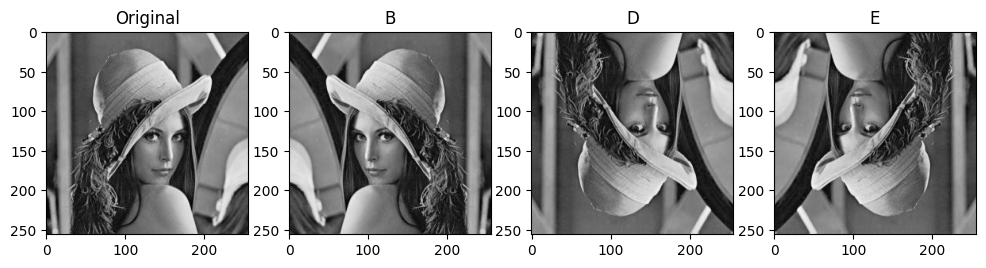

In [68]:
plt.figure(figsize=(12,8))
plt.subplot(141)
plt.imshow(lena,cmap='gray')
plt.title("Original")

plt.subplot(142)
plt.imshow(lena_hor_flip2,cmap='gray')
plt.title("B")
plt.subplot(143)
plt.imshow(lena_ver_flip2,cmap='gray')
plt.title("D")
plt.subplot(144)
plt.imshow(lena_center_flip2,cmap='gray')
plt.title("E")

### Operations logiques

Text(0.5, 1.0, 'f')

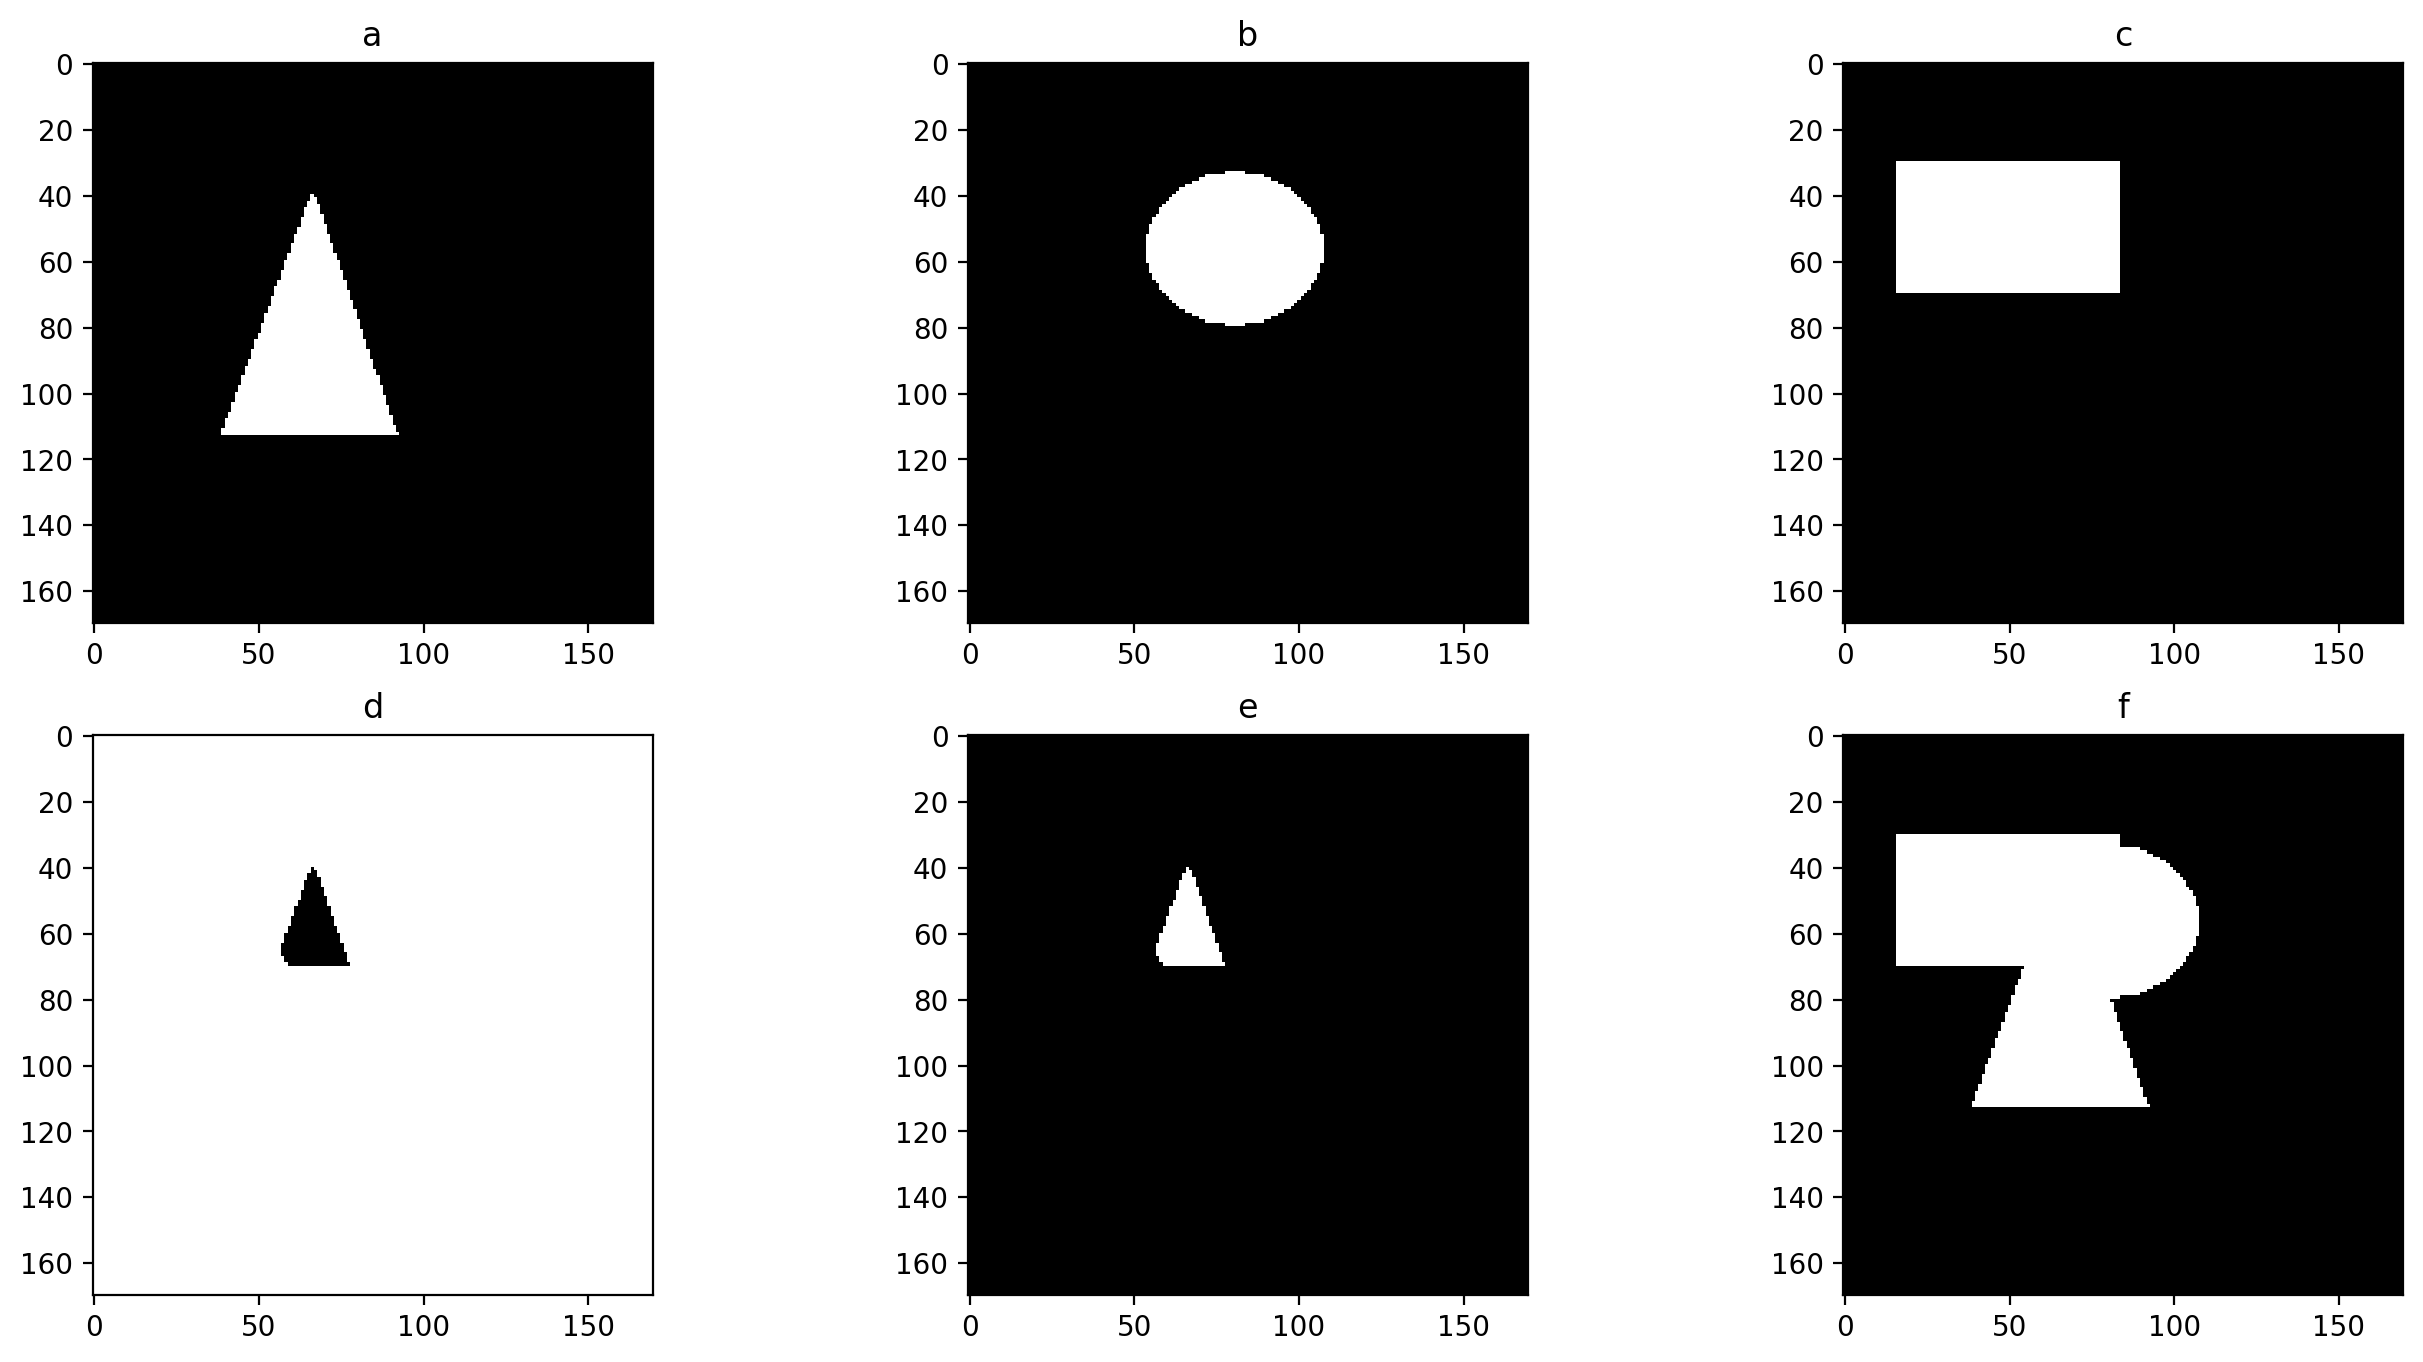

In [69]:
plt.figure(figsize=(16,8),dpi=200)
rect = cv2.imread("images2021/rectangle.bmp",0)/255
circle = cv2.imread('images2021/cercle.bmp',0)/255
triangle = cv2.imread("images2021/triangle.bmp",0)/255
im_b =np.logical_or(triangle,circle)
im_e = np.logical_and(np.logical_and(triangle,circle),rect)*1
im_d = np.logical_not(im_e)*1
im_f = np.logical_or(np.logical_or(rect,triangle),circle)*1
plt.subplot(231)
plt.imshow(triangle,cmap='gray')
plt.title("a")
plt.subplot(232)
plt.imshow(circle,cmap='gray')
plt.title("b")
plt.subplot(233)
plt.imshow(rect,cmap='gray')
plt.title("c")
plt.subplot(234)
plt.imshow(im_d,cmap='gray')
plt.title("d")
plt.subplot(235)
plt.imshow(im_e,cmap='gray')
plt.title("e")
plt.subplot(236)
plt.imshow(im_f,cmap='gray')
plt.title("f")



### Operations arithmétiques

* **Lire les images en niveaux de gris seq1.bmp et contour.bmp.**


In [70]:
seq = cv2.imread('images2021/seq1.bmp',0)
contour = cv2.imread('images2021/contour.bmp',0)

* **Afficher les deux images sur la même figure.**

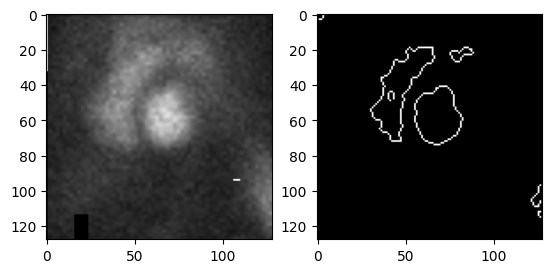

In [71]:
plt.subplot(121)
plt.imshow(seq,cmap="gray")
plt.subplot(122)
plt.imshow(contour,cmap="gray")

* **Superposer les contours sur l’image d’origine pour délimiter les différentes régions de l’image.**

In [72]:
result = seq+contour*255
result[result>255] = 255

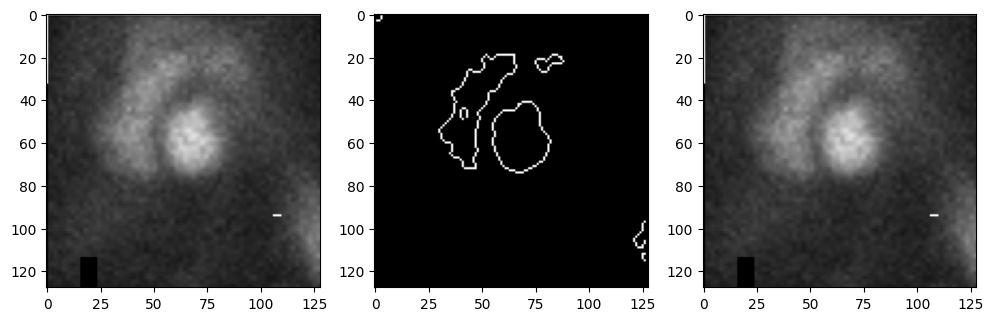

In [73]:
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(seq,cmap="gray")
plt.subplot(132)
plt.imshow(contour,cmap="gray")
plt.subplot(133)
plt.imshow(result,cmap="gray")

## Transformation spectrales: Transformée de Fourier 

### Transformée de Fourier 

* **Charger les images carre1.png et carre2.png**

In [74]:
c1 = cv2.imread("images2021/carre1.png",0)
c2 = cv2.imread("images2021/carre2.png",0)

* **Appliquer la Transformée de Fourier « fft2 ».** 



In [75]:
spectre_complex = np.fft.fft2(c1)
spectre_image = np.abs(spectre_complex)
c1_fourier = np.fft.fftshift(spectre_image)
c2_fourier =np.fft.fftshift( np.abs(np.fft.fft2(c2)))

* **Afficher les spectres d’amplitude de ces images.**

Text(0.5, 1.0, 'Transformée de Fourier carré 2')

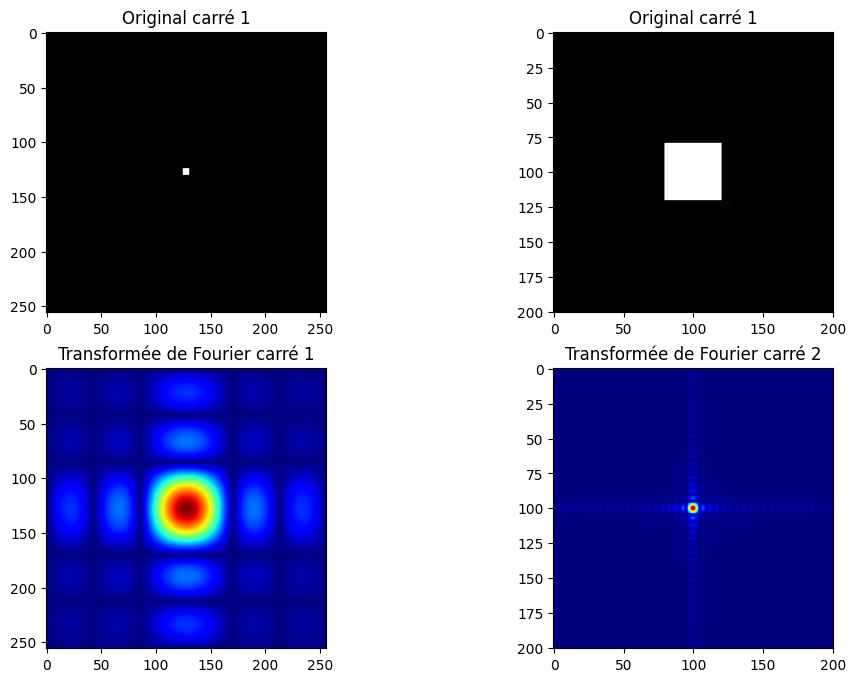

In [76]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(c1,cmap='gray')
plt.title("Original carré 1")

plt.subplot(222)
plt.imshow(c2,cmap='gray')
plt.title("Original carré 1")
plt.subplot(223)
plt.imshow(c1_fourier,cmap='jet')
plt.title("Transformée de Fourier carré 1")
plt.subplot(224)
plt.imshow(c2_fourier,cmap='jet')
plt.title("Transformée de Fourier carré 2")

* **Refaire le même traitement pour les images carre1dec1.png, carre1dec2.png, carre1dec3.png et carre1r45.png .**

In [77]:
cd1 = plt.imread('images2021/carre1dec1.png')
cd2 = plt.imread('images2021/carre1dec2.png')
cd3= plt.imread('images2021/carre1dec3.png')
cr45= plt.imread('images2021/carre1r45.png')
cd1_fourier =np.fft.fftshift( np.abs(np.fft.fft2(cd1)))
cd2_fourier =np.fft.fftshift( np.abs(np.fft.fft2(cd2)))
cd3_fourier =np.fft.fftshift( np.abs(np.fft.fft2(cd3)))
cr45_fourier =np.fft.fftshift( np.abs(np.fft.fft2(cr45)))

Text(0.5, 1.0, ' Spectre Carré 1r45')

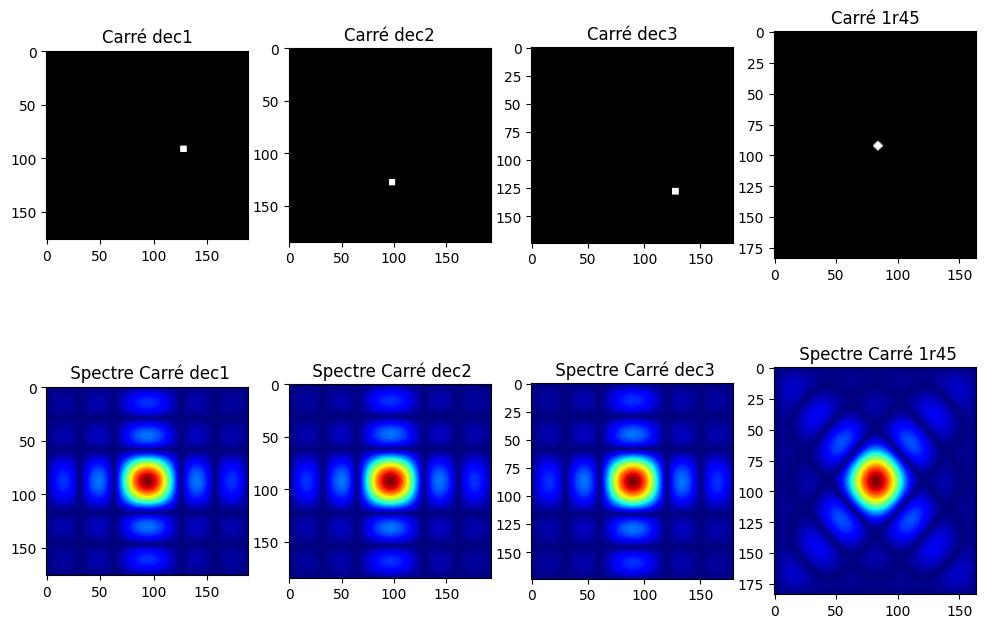

In [78]:
plt.figure(figsize=(12,8))
plt.subplot(241)
plt.imshow(cd1,cmap='gray')
plt.title("Carré dec1")

plt.subplot(245)
plt.imshow(cd1_fourier,cmap='jet')
plt.title(" Spectre Carré dec1")



plt.subplot(242)
plt.imshow(cd2,cmap='gray')
plt.title("Carré dec2")

plt.subplot(246)
plt.imshow(cd2_fourier,cmap='jet')
plt.title(" Spectre Carré dec2")
plt.subplot(243)
plt.imshow(cd3,cmap='gray')
plt.title("Carré dec3")
plt.subplot(247)
plt.imshow(cd3_fourier,cmap='jet')
plt.title(" Spectre Carré dec3")

plt.subplot(244)
plt.imshow(cr45,cmap='gray')
plt.title("Carré 1r45")
plt.subplot(248)
plt.imshow(cr45_fourier,cmap='jet')
plt.title(" Spectre Carré 1r45")

* **Refaire le même traitement pour les images sinus1.png, sinus1r45.png et sinus1r90.png.**

In [79]:
sn1 = plt.imread('images2021/sinus1.png')
sn45 = plt.imread('images2021/sinus1r45.png')
sn90 = plt.imread('images2021/sinus1r90.png')
sn1_fourier =np.fft.fftshift( np.abs(np.fft.fft2(sn1)))
sn45_fourier =np.fft.fftshift( np.abs(np.fft.fft2(sn45)))
sn90_fourier =np.fft.fftshift( np.abs(np.fft.fft2(sn90)))

Text(0.5, 1.0, ' Spectre Sinus 45')

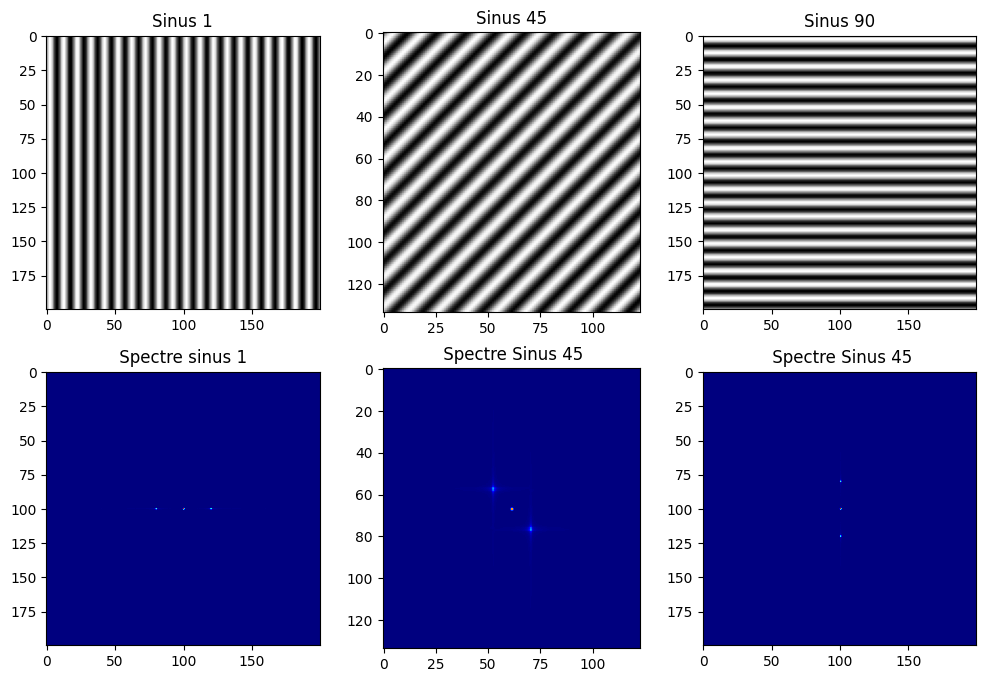

In [80]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(sn1,cmap='gray')
plt.title("Sinus 1")

plt.subplot(234)
plt.imshow(sn1_fourier,cmap='jet')
plt.title(" Spectre sinus 1 ")



plt.subplot(232)
plt.imshow(sn45,cmap='gray')
plt.title("Sinus 45")

plt.subplot(235)
plt.imshow(sn45_fourier,cmap='jet')
plt.title(" Spectre Sinus 45")

plt.subplot(233)
plt.imshow(sn90,cmap='gray')
plt.title("Sinus 90")

plt.subplot(236)
plt.imshow(sn90_fourier,cmap='jet')
plt.title(" Spectre Sinus 45")

* **Affichage 3D**

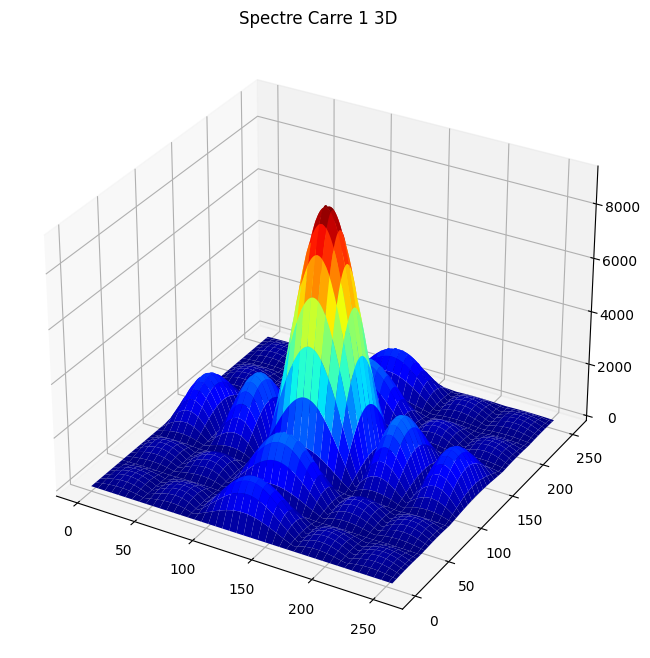

In [81]:
fig = plt.figure(figsize=(12,8))
xx1, yy1 = np.mgrid[0:c1_fourier.shape[0], 0:c1_fourier.shape[1]]
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, yy1, c1_fourier, cmap='jet')
plt.title("Spectre Carre 1 3D")
plt.show()

Text(0.5, 0.92, 'Spectre Carre 2 3D')

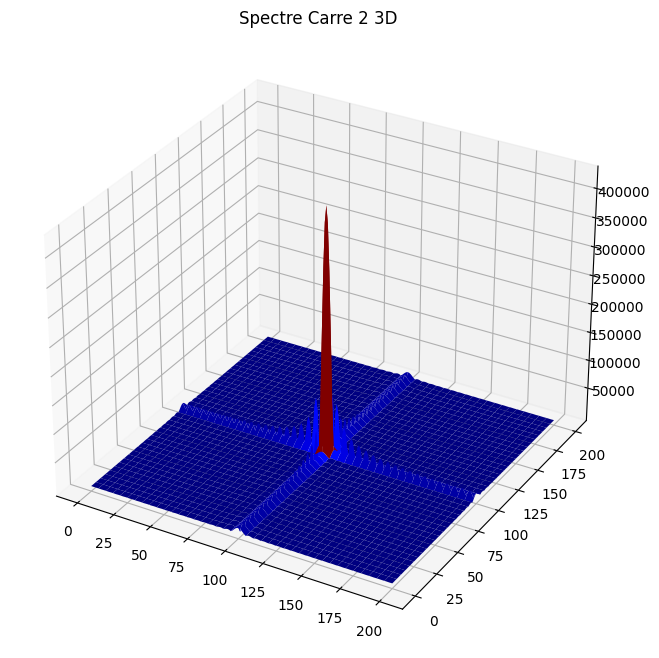

In [82]:
fig = plt.figure(figsize=(12,8))
xx2, yy2 = np.mgrid[0:c2_fourier.shape[0], 0:c2_fourier.shape[1]]
ax = plt.axes(projection='3d')
ax.plot_surface(xx2, yy2, c2_fourier, cmap='jet')
plt.title("Spectre Carre 2 3D")

* **Conclure sur les spectres d’amplitude récupérés.**

<p style="text-align: justify">On peut conclure que lorsque le signal original dans la direction horizontale, son spectre est dans la direction verticale et vice-versa.</br>
<b>Si tx augmente, tu diminue.</b>
</p>

# TP3: Histogramme et Réhaussement d'images

## Introduction

<p style="text-align: justify">
Ce TP permet de mettre en relief l’utilité des histogrammes dans l’analyse des images et son importance dans les techniques de rehaussement d’image.</br>
Nous verrons par exemple l'égalisation d'histogramme permet d'améliorer la qualité visuelle des images.
</p>

## Calcul et visualisation d’histogramme

### Visualisation de l'histogramme des niveaux de gris 

* **Charger les images suivantes: stretch_original.jpg et pout.jpg**

In [83]:
img = cv2.imread("images2021/stretch_original.jpg", 0)
img_pout = cv2.imread("images2021/pout.jpg", 0)

* **Représenter l'histogramme des niveaux de gris de ces images**

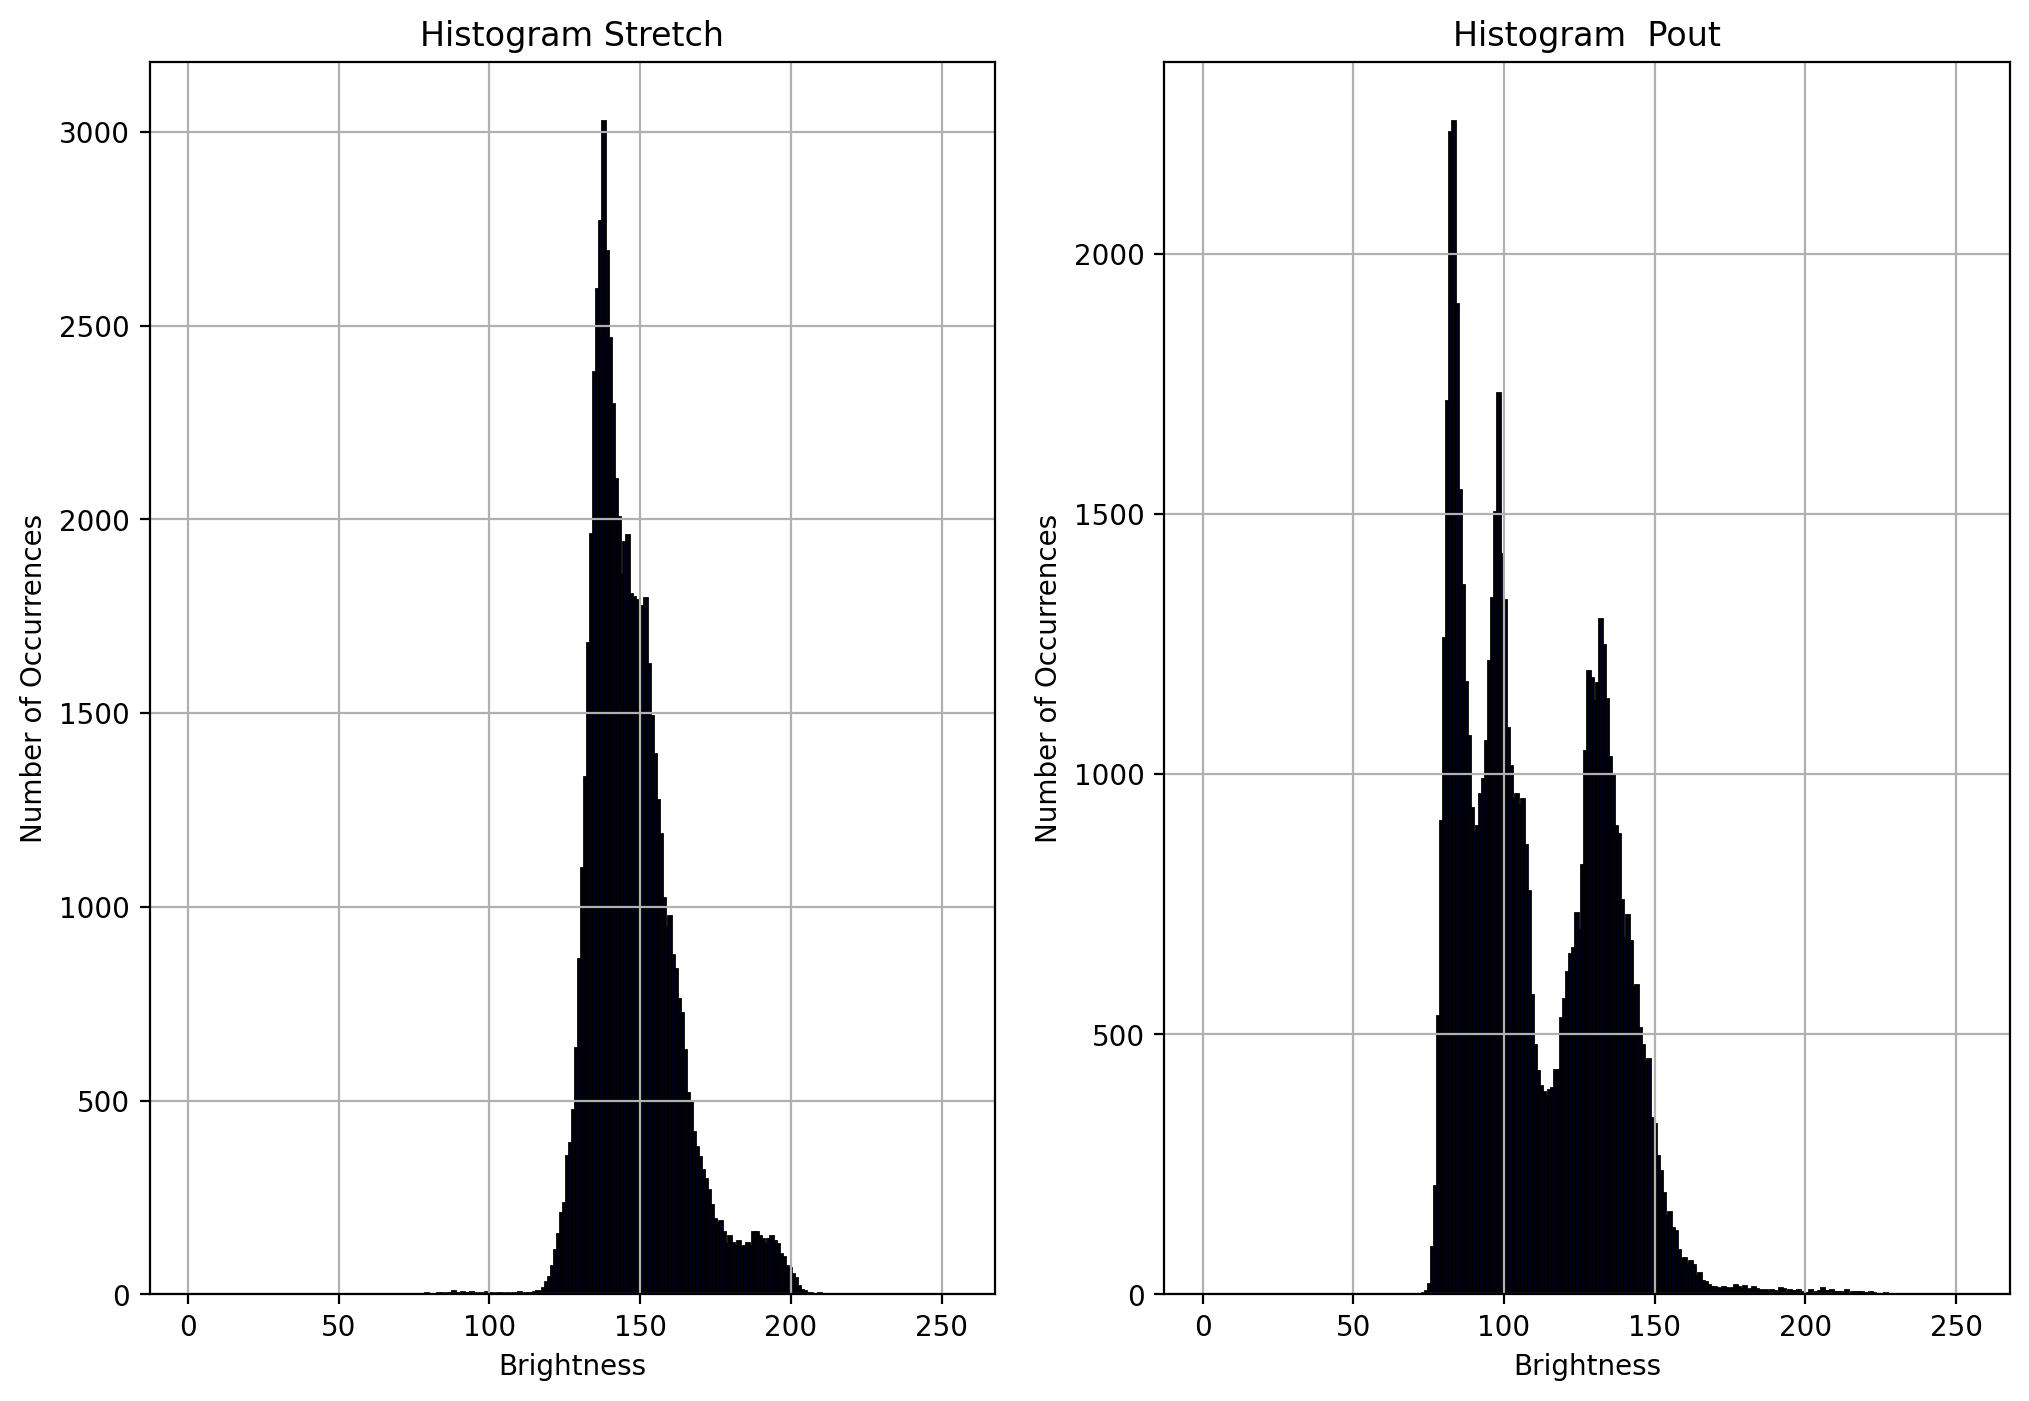

In [84]:
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.title('Histogram Stretch')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid()
plt.subplot(122)
plt.hist(img_pout.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  Pout')
plt.grid()


* **Comment interprétez-vous ces histogrammes?**


On peut dire que les valeurs des pixels sont concentrées entre **100 et 200** pour chaque image.


## Techniques de rehaussement 

### Recadrage de la dynamique 

* **Lire et afficher l’image stretch_original.jpg ainsi que son histogramme**

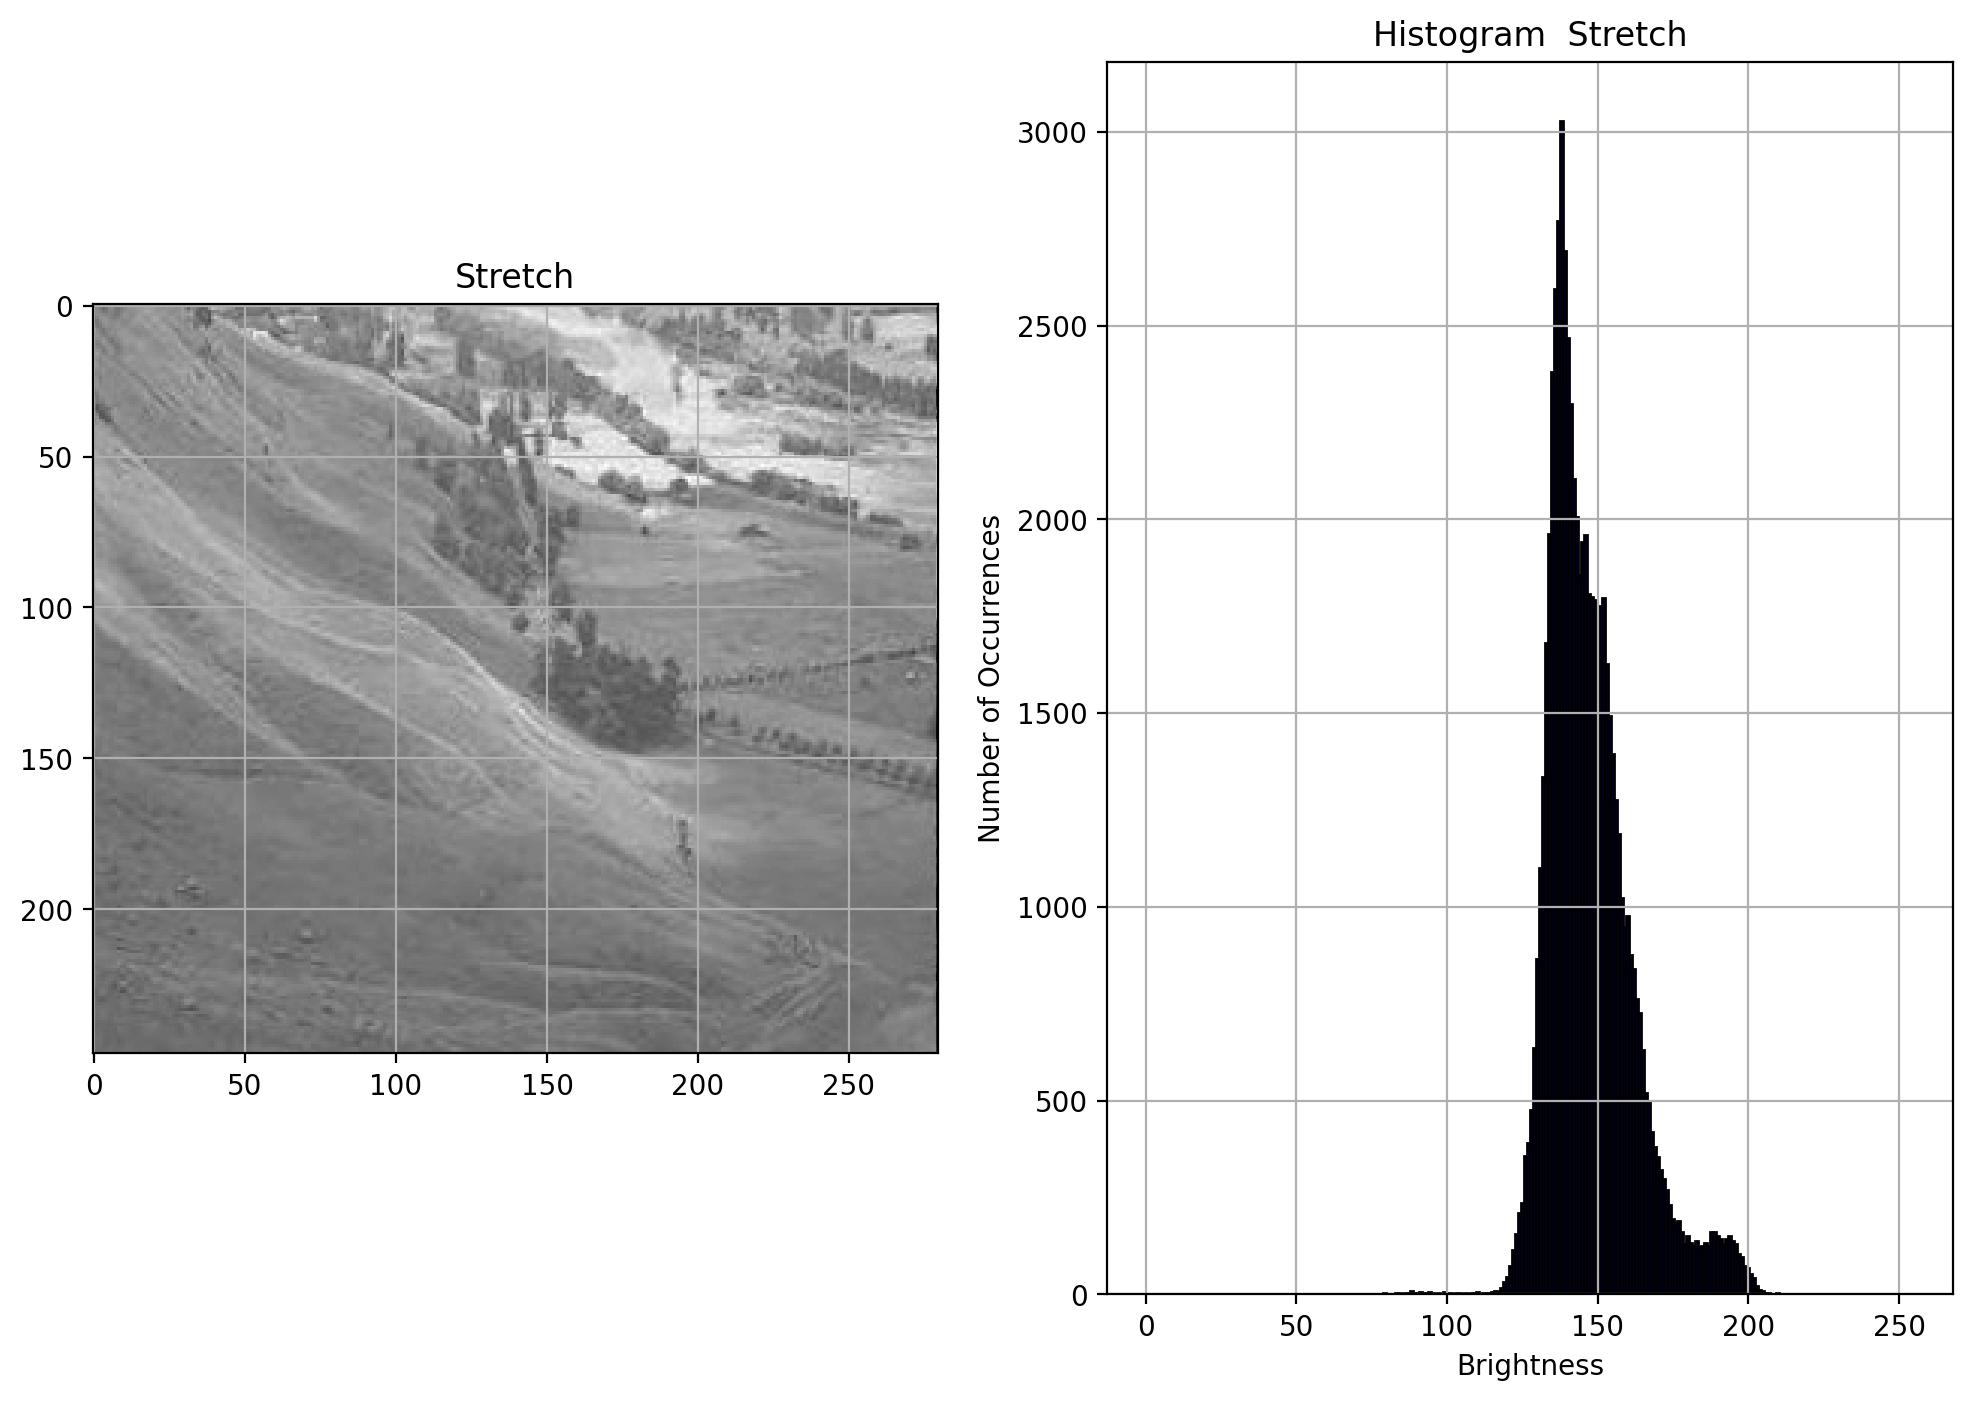

In [85]:
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Stretch')
plt.grid()
plt.subplot(122)
plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  Stretch')
plt.grid()

* **Appliquer la méthode de recadrage de la dynamique sur l’image et  Afficher l’histogramme obtenu.**

Text(0.5, 1.0, 'Histogramme Recadré')

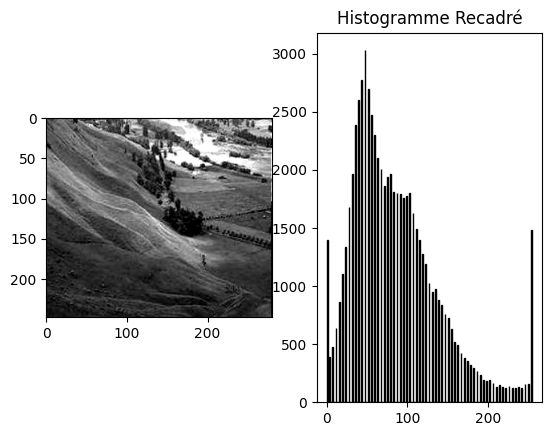

In [86]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range = (p2, p98))

plt.subplot(121)
plt.imshow(img_rescale,cmap='gray')
plt.subplot(122)
plt.hist(img_rescale.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.title('Histogramme Recadré')

* **Commenter**

On voit maintenant que les valeurs des pixels sont repartis à peu près uniformément entre 0 et 255.</br>
L'image obtenue est de meilleure qualité (visuelle).

### Egalisation de l’histogramme 

* **Lire et afficher l’image « stretch_original.jpg**



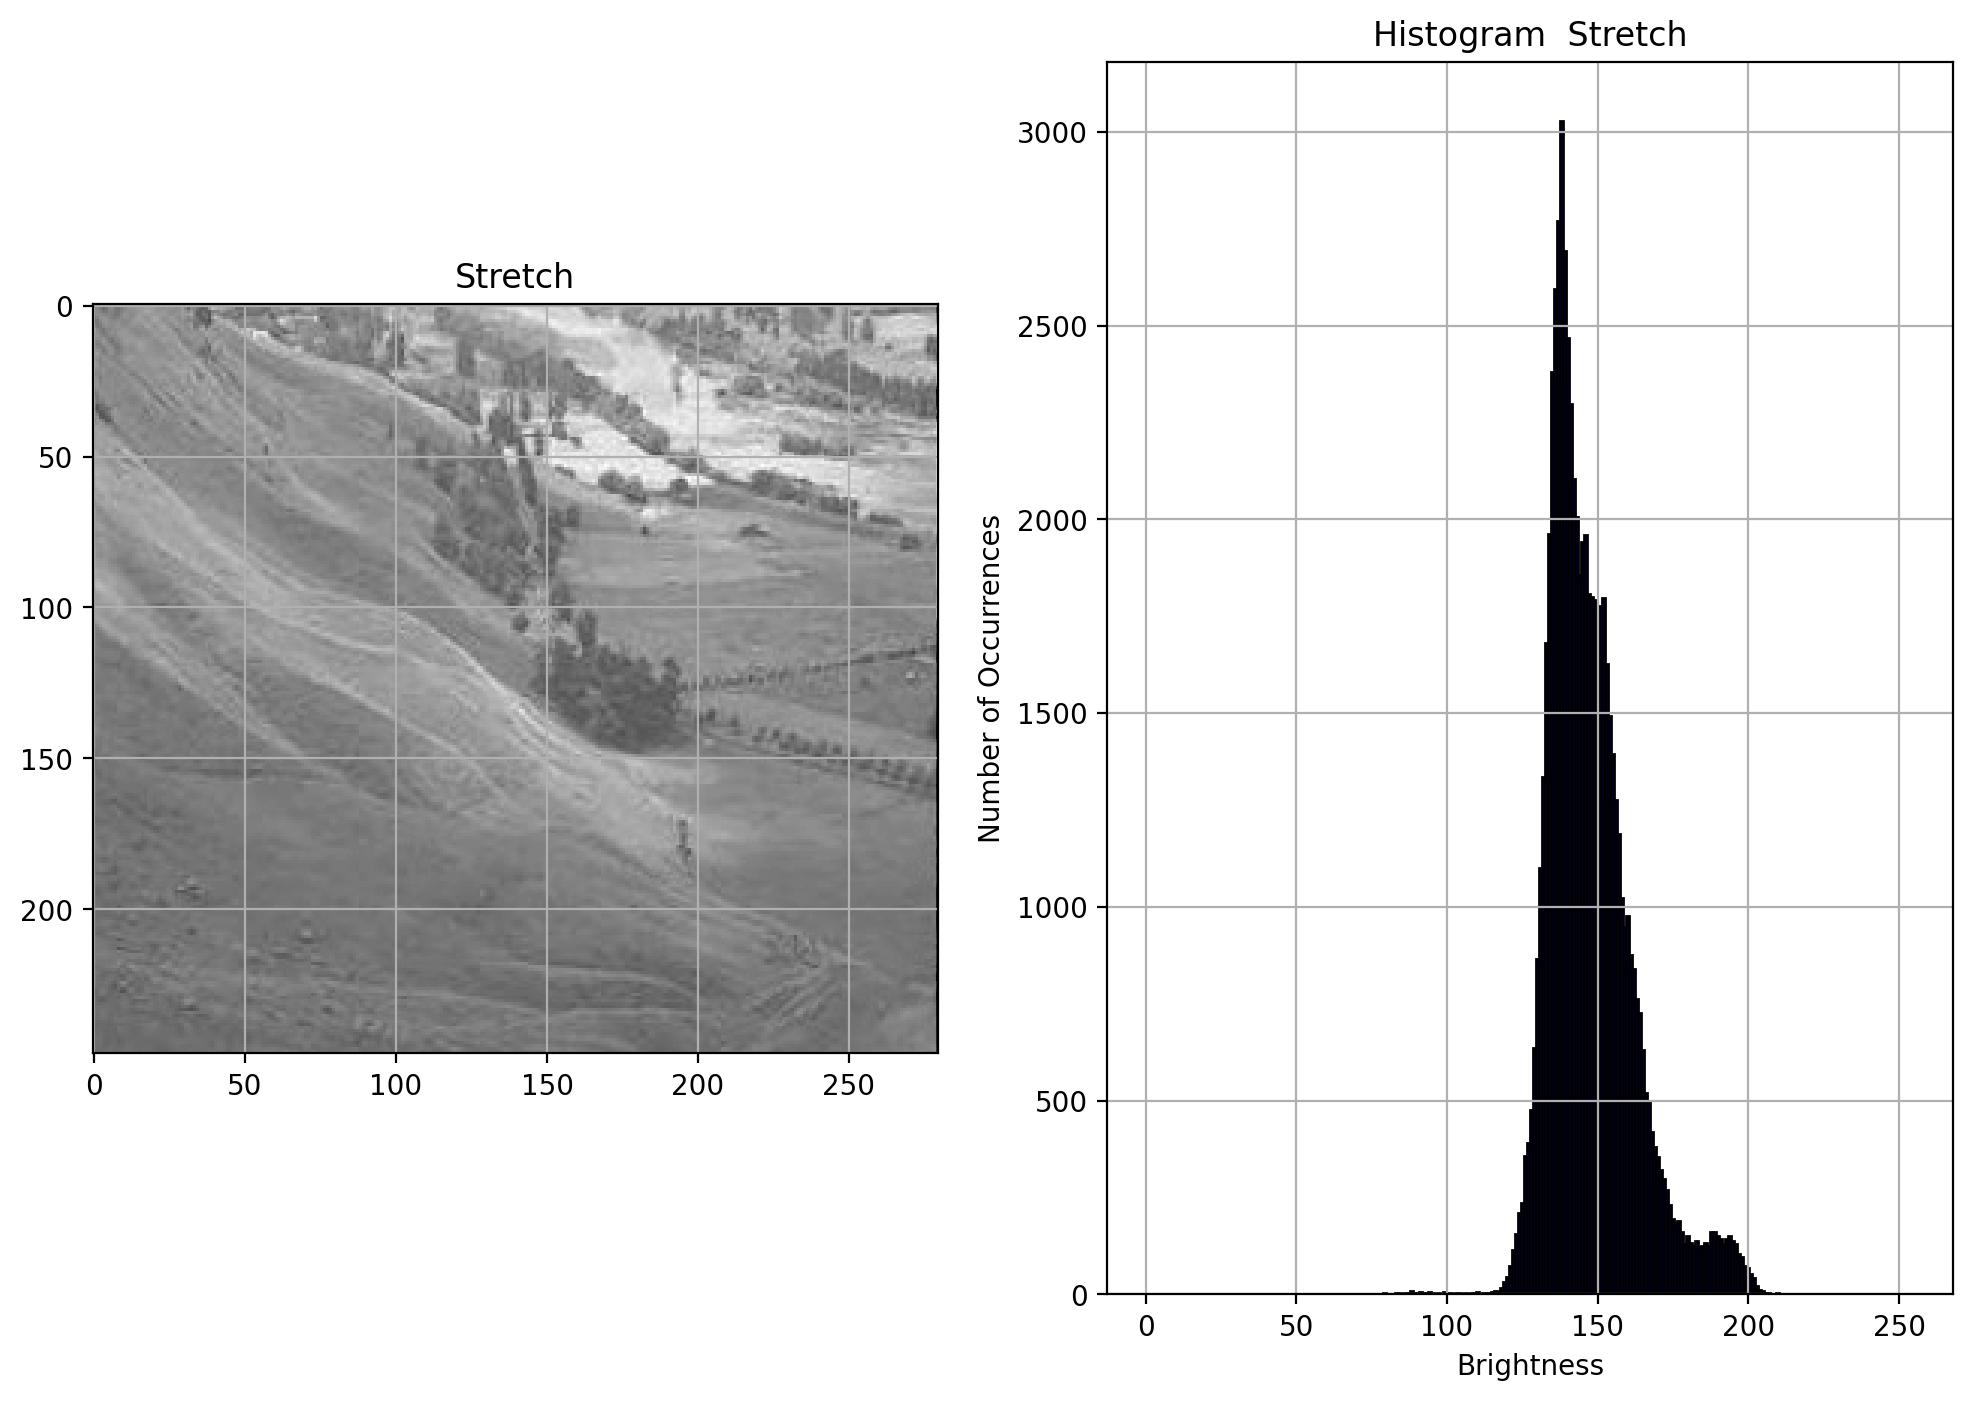

In [87]:
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Stretch')
plt.grid()
plt.subplot(122)
plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  Stretch')
plt.grid()

* **Egaliser son histgramme, puis afficher l’histogramme de l’image résultat.**

Text(0.5, 1.0, 'Histogramme Egalisée')

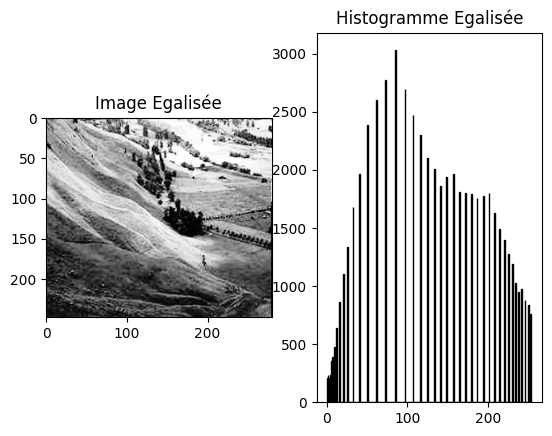

In [88]:
img_eq = 288*exposure.equalize_hist(img)
plt.subplot(121)
plt.imshow(img_eq,cmap='gray')
plt.title('Image Egalisée')
plt.subplot(122)
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.title('Histogramme Egalisée')

### Inversion des niveaux de gris (négatif)  

* **Lire et afficher l’image lena.bmp et tracer son histogramme sur la même figure.**

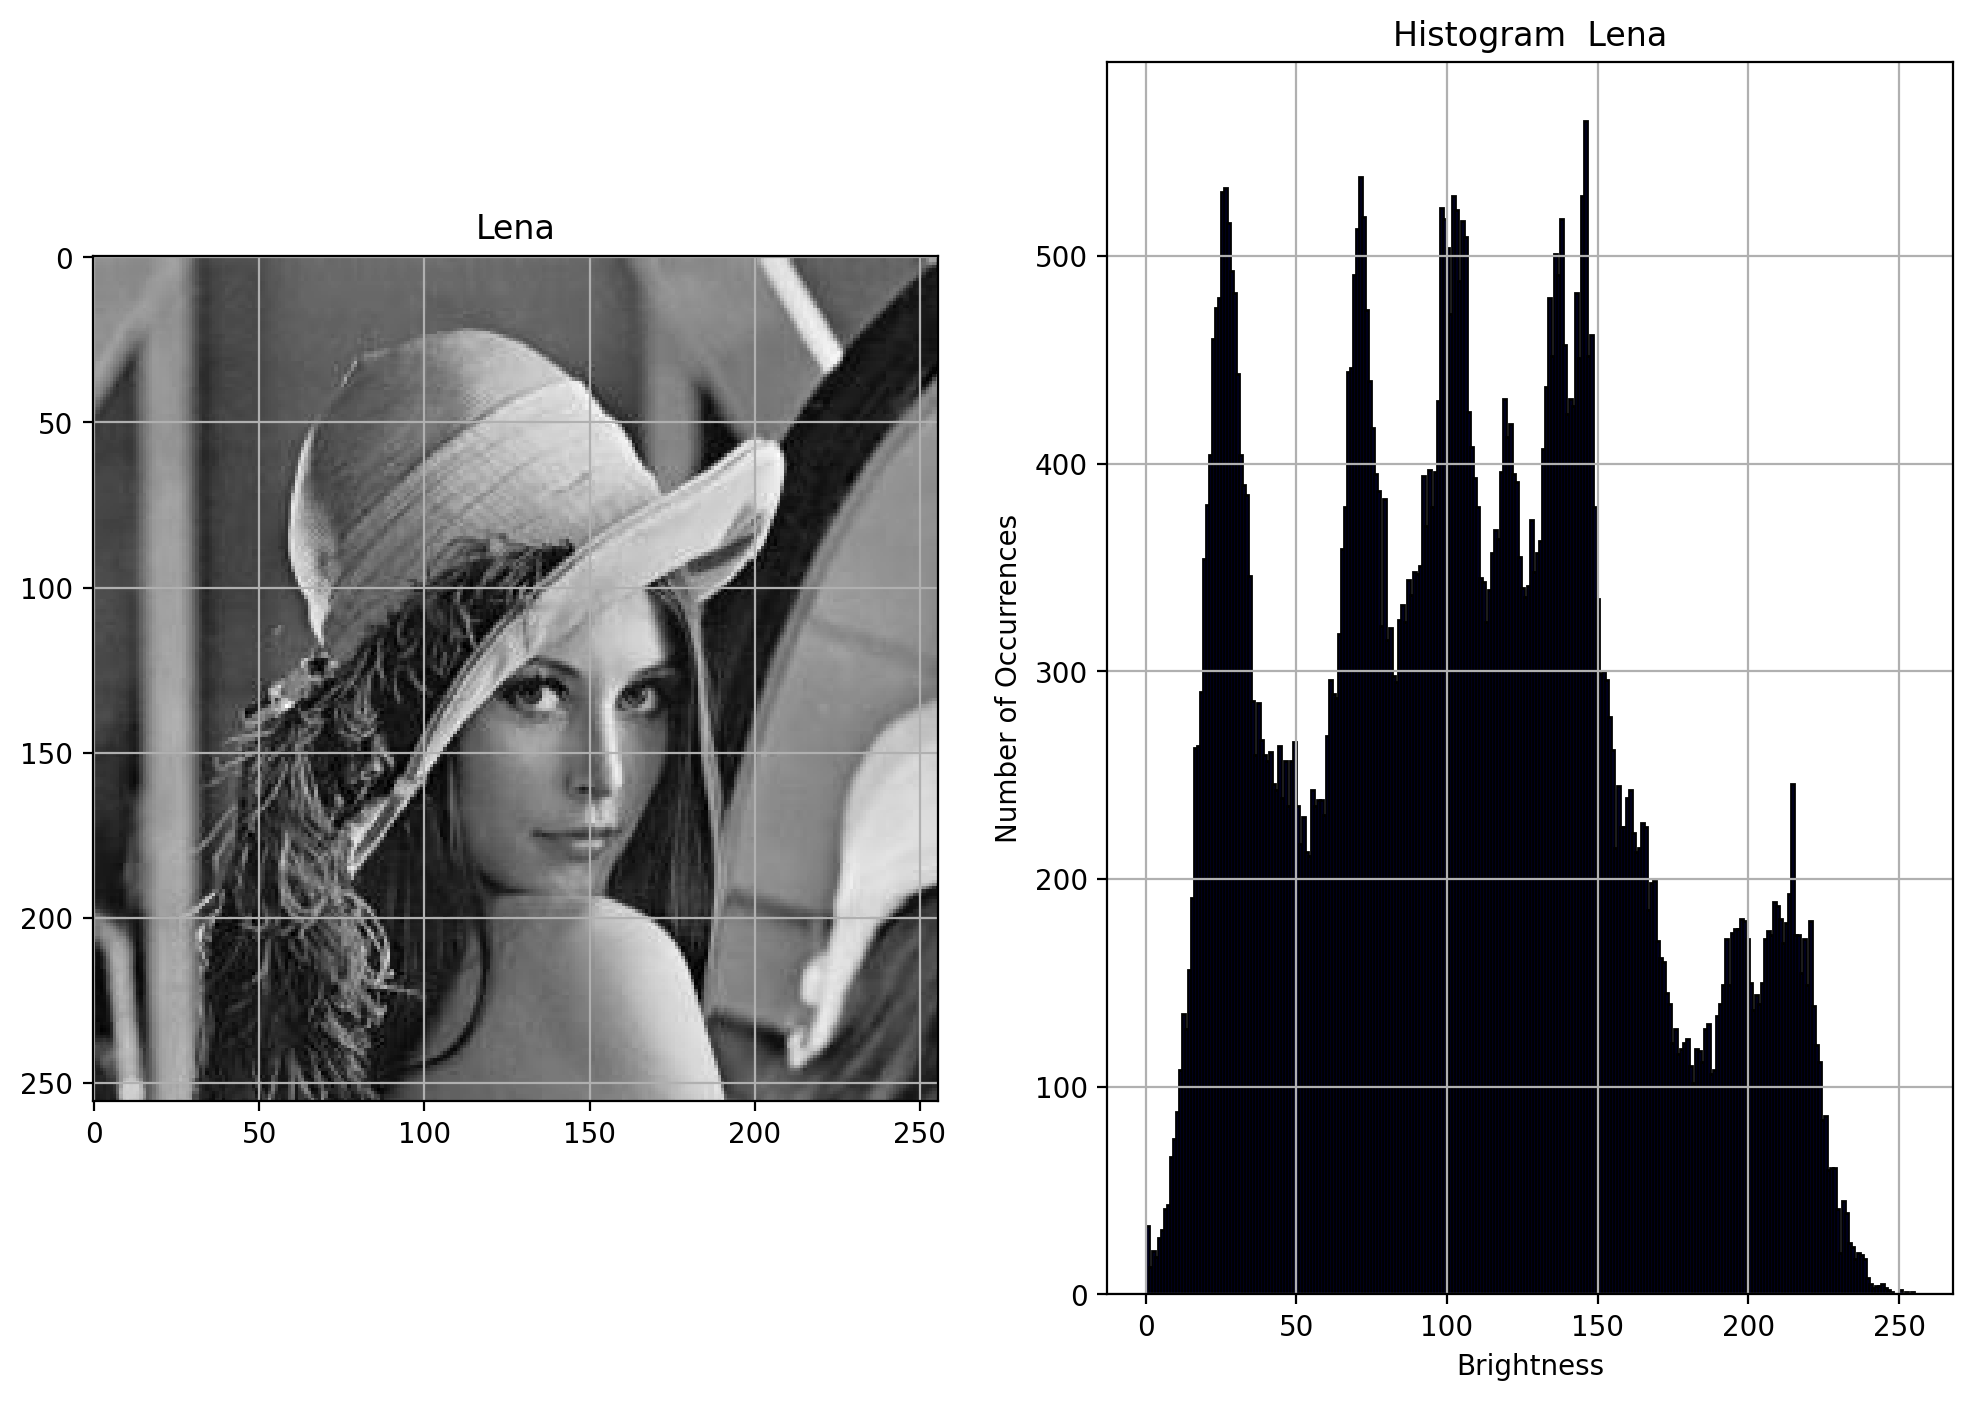

In [89]:
lena_bmp = plt.imread("images2021/lena.bmp")
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(121)
plt.imshow(lena_bmp,cmap='gray')
plt.title('Lena')
plt.grid()
plt.subplot(122)
plt.hist(lena_bmp.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  Lena')
plt.grid()

* **Inverser la dynamique de l’image avec f(x)=255-x. Tracer l’histogramme sur la même figure

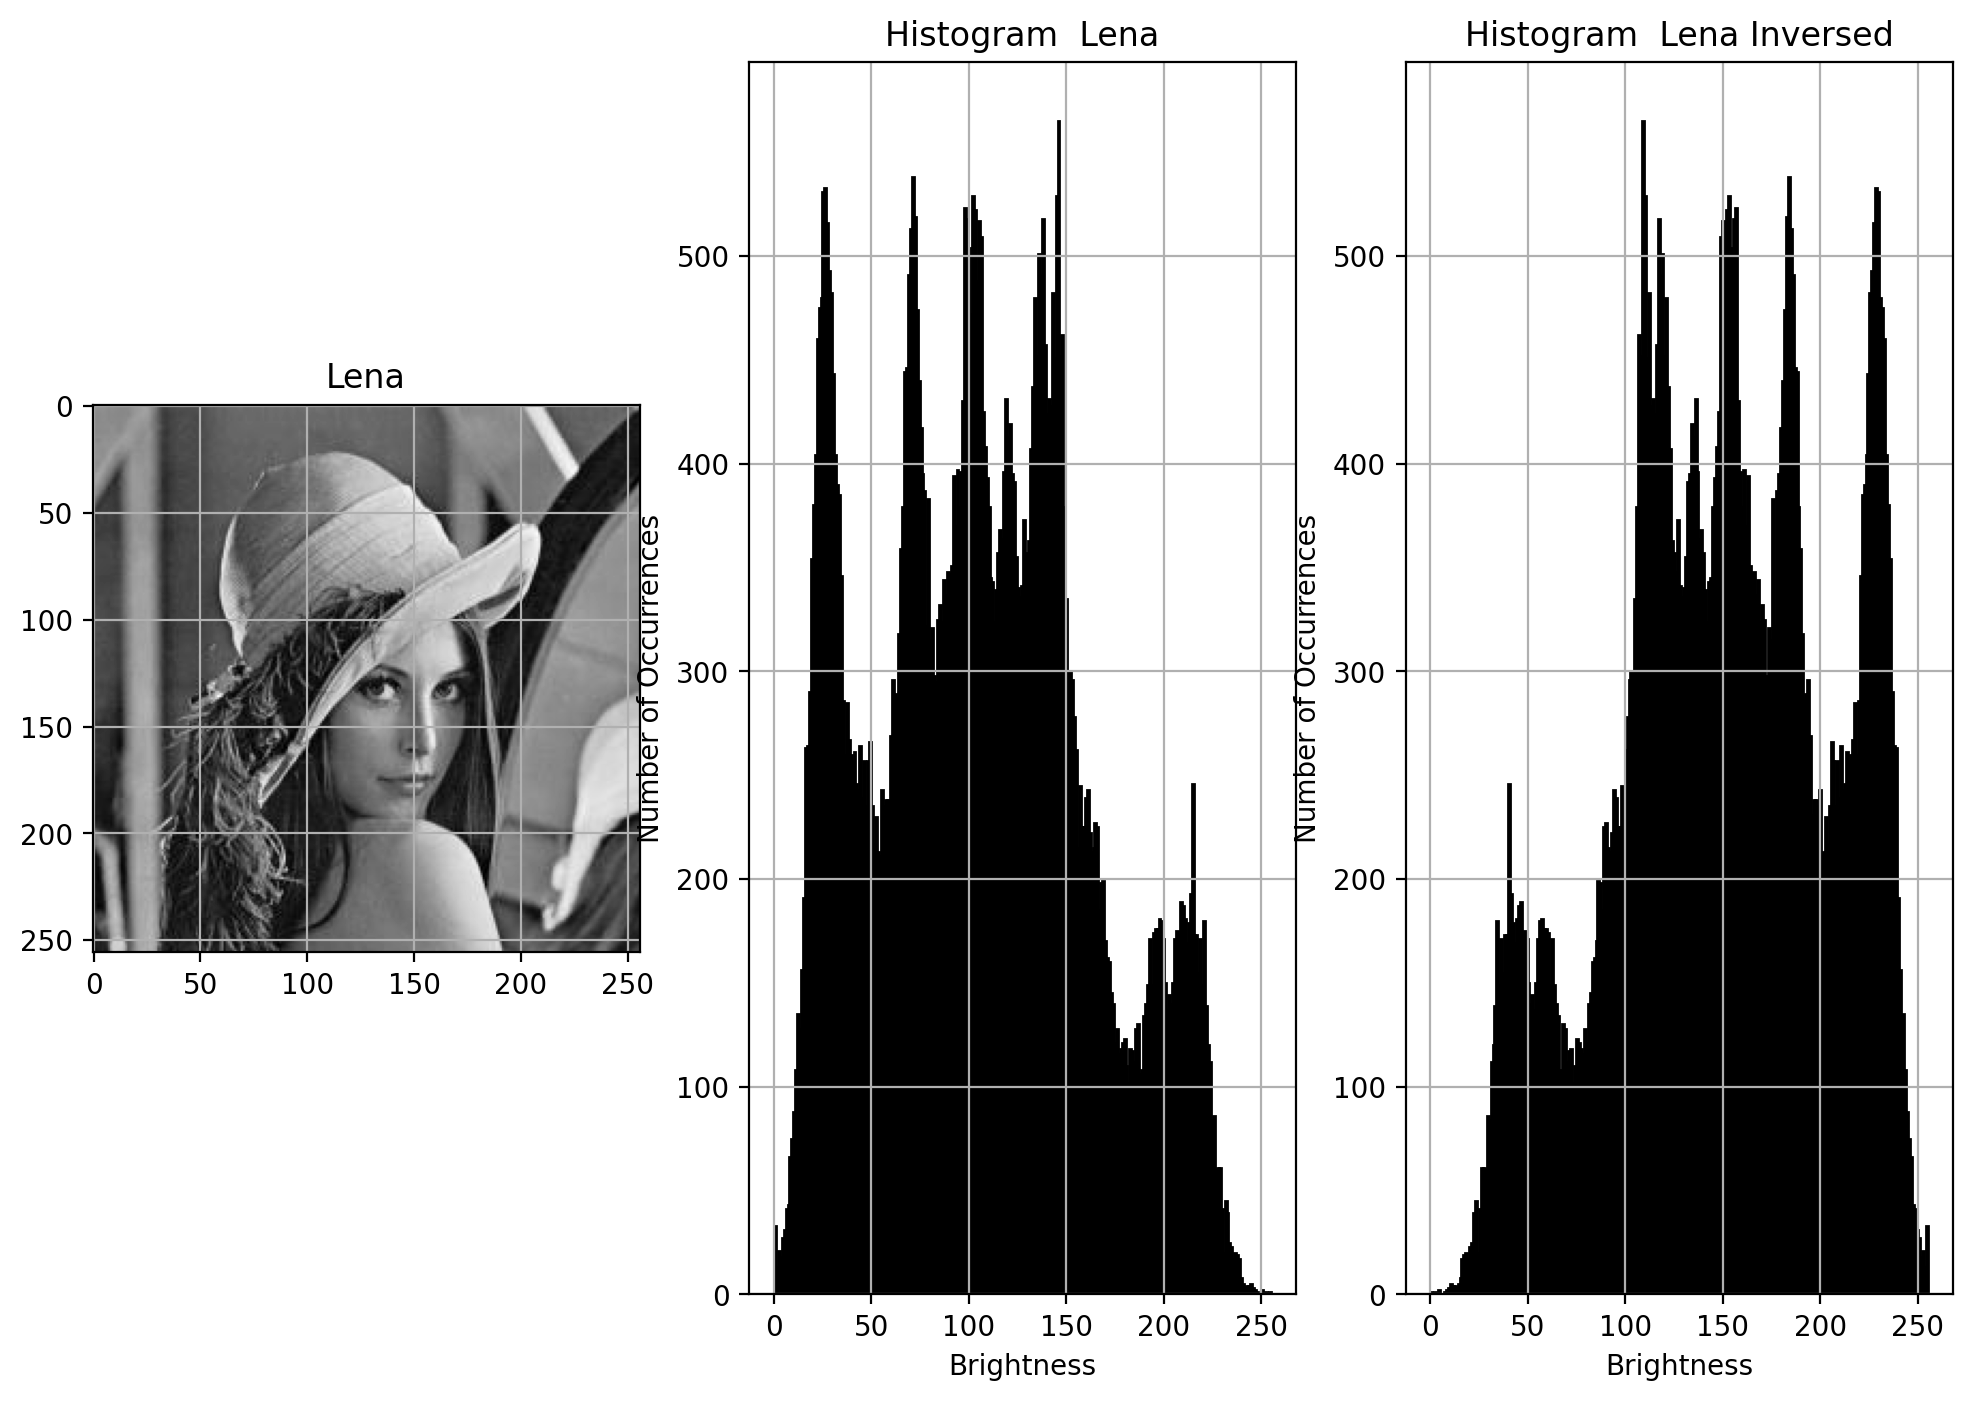

In [90]:
lena_bmp_inv = 255 - lena_bmp
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(131)
plt.imshow(lena_bmp,cmap='gray')
plt.title('Lena')
plt.grid()
plt.subplot(132)
plt.hist(lena_bmp.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  Lena')
plt.grid()
plt.subplot(133)
plt.hist(lena_bmp_inv.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  Lena Inversed')
plt.grid()


* **Commenter**

On remarque que les pixels ont été remplacé par leur complémentaire.

### Renforcement de contraste 

* **Lire et afficher l’image de la retine.bmp, puis afficher sur la même figure son histogramme.** 

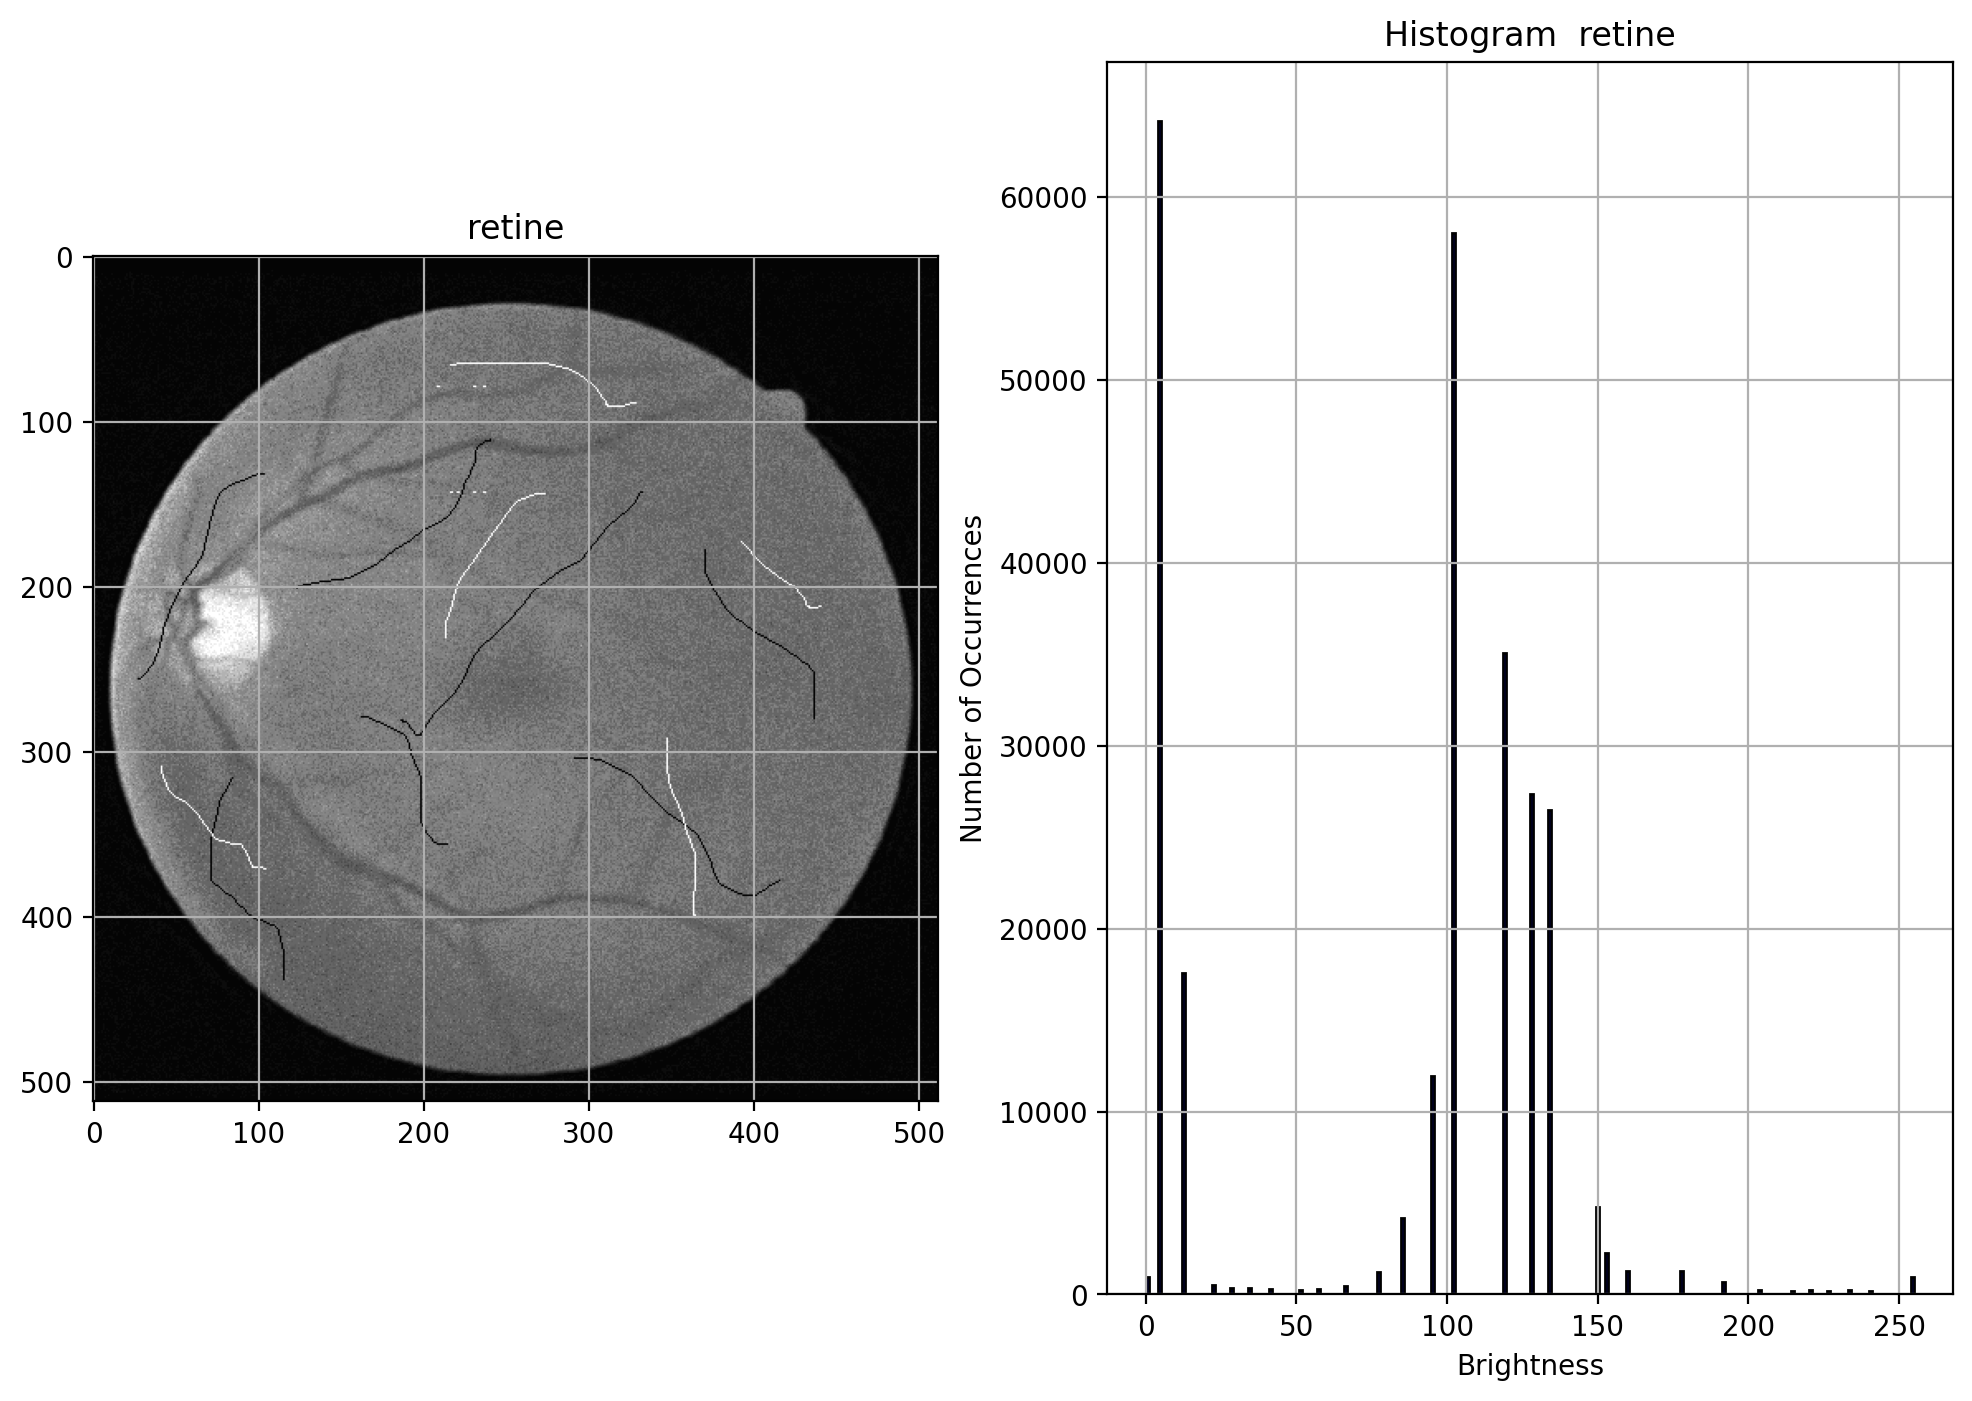

In [91]:
retine = cv2.imread('images2021/retine.bmp',0)
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(121)
plt.imshow(retine,cmap='gray')
plt.title('retine')
plt.grid()
plt.subplot(122)
plt.hist(retine.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram  retine')
plt.grid()

# TP4: Restauration par Filtrage

## Introduction
 



Ce TP nous a permi d'appliquer certaines techniques de restauration d'images dégradées.</br>
La source de dégradation pouvant être le bruit sel et poivre, gaussien.

## Génération des bruits 

> Filtrage dans le domaine spatial 

### Filtrage linéaire d’une image en niveaux de gris 

* **Importer les libraires nécessaires**

* **Lire l’image scan.bmp ou hoffman.bmp.**

In [92]:
scan = cv2.imread('images2021/scan.bmp',0)
hoffman = cv2.imread('images2021/Hoffman.bmp',0)

* **Ajouter un bruit ‘sel et poivre’ à l’image. </br>Afficher, sur la même figure, l’image originale, l’image bruitée et les histogrammes des deux images**

In [93]:
scan_noise = random_noise(scan, mode='s&p')
hoffman_noise = random_noise(hoffman, mode='s&p')

Text(0.5, 1.0, 'Histogram scan')

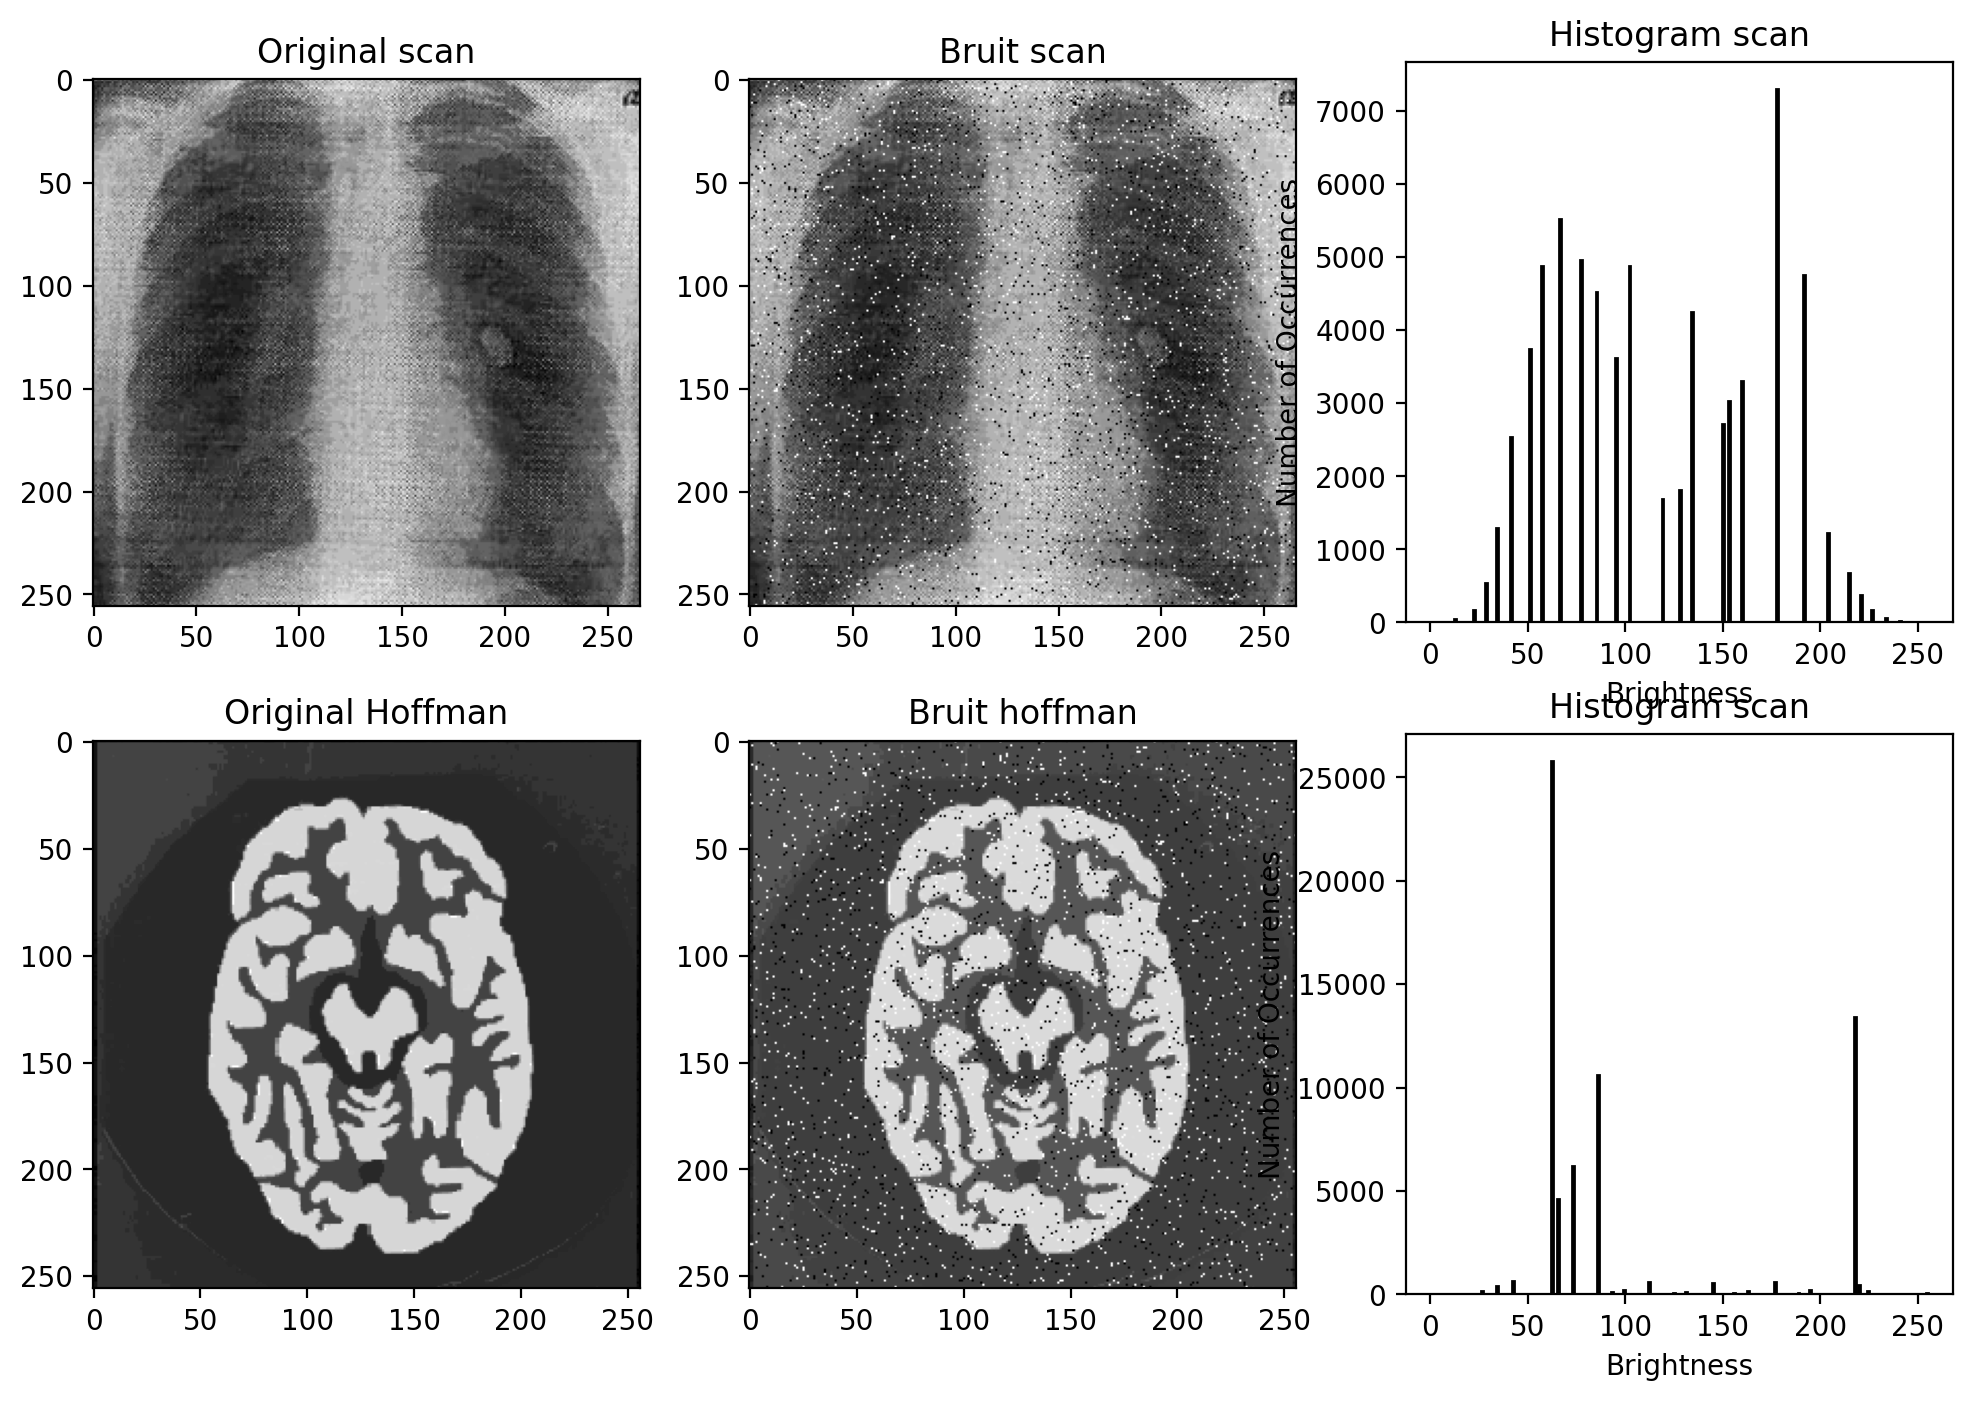

In [94]:
plt.figure(figsize=(12,8),dpi=200)
plt.subplot(231)
plt.imshow(scan,cmap='gray')
plt.title('Original scan')

plt.subplot(232)
plt.imshow(scan_noise,cmap='gray')
plt.title('Bruit scan')
plt.subplot(233)
plt.hist(scan.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram scan')


plt.subplot(234)
plt.imshow(hoffman,cmap='gray')
plt.title('Original Hoffman')

plt.subplot(235)
plt.imshow(hoffman_noise,cmap='gray')
plt.title('Bruit hoffman')
plt.subplot(236)
plt.hist(hoffman.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.title('Histogram scan')

* **Déclarer h un noyau qui correspond à un filtre moyenneur de taille 3x3.**

In [95]:
h = np.ones((3,3))
h

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

* **Calculer le produit de convolution de l’image par ce filtre en utilisant la fonction python « cv2.filter2D ».**

In [96]:
scan_filtered = cv2.filter2D(scan_noise,-1,kernel=h)
hoffman_filtered = cv2.filter2D(hoffman_noise,-1,kernel=h)

* **Filtrer l’image avec un filtre moyenneur de taille 3x3, 5x5, puis 7x7, en utilisant la fonction de Python « cv2.blur ».**

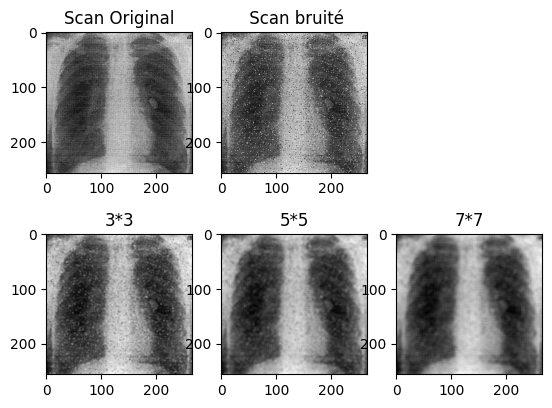

In [97]:
blur1 = cv2.blur(scan_noise, (3,3))
blur2 = cv2.blur(scan_noise, (5,5))
blur3 = cv2.blur(scan_noise, (7,7))


plt.figure()
plt.subplot(231),plt.imshow(scan,cmap="gray"),plt.title('Scan Original')

plt.subplot(232),plt.imshow(scan_noise,cmap="gray"),plt.title(' Scan bruité')

plt.subplot(234),plt.imshow(blur1,cmap="gray"),plt.title('3*3')

plt.subplot(235),plt.imshow(blur2,cmap="gray"),plt.title('5*5')

plt.subplot(236),plt.imshow(blur3,cmap="gray"),plt.title('7*7')

plt.show()

* **Comparer visuellement les résultats obtenus.**

<p style="text-align: justify">
Ce filtre permet d'éliminer <b>une petite partie</b> du bruit sel et poivre mais plus la taille du filtre augmente plus l'image devient floue.
</p>

* **Calculer le PSNR de chaque image.**

In [98]:
psnr1 = peak_signal_noise_ratio(scan, blur1)
print(psnr1)
psnr2 = peak_signal_noise_ratio(scan, blur2)
print(psnr2)
psnr3 = peak_signal_noise_ratio(scan, blur3)
print(psnr3)

6.20700773904313
6.206905344344395
6.206859749047597


/tmp/ipykernel_223695/2865738724.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr1 = peak_signal_noise_ratio(scan, blur1)
/tmp/ipykernel_223695/2865738724.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr2 = peak_signal_noise_ratio(scan, blur2)
/tmp/ipykernel_223695/2865738724.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr3 = peak_signal_noise_ratio(scan, blur3)


La meilleure image au sens PSNR est <b>l'image  avec filtre 7x7</b>

# Conlusion Générale

<p style="text-align: justify">Au terme de ces différent Travaux pratiques, nous avons appris plusieurs techniques de restauration,réhaussement et de transformations des images numériques.</br>
Ces techniques seront importantes lorsque l'on devra construire des modèles de Classification d'images.</p>